<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib as plt
import seaborn as sns; sns.set()

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
headers = ['State', 'Rate', 'Verbal', 'Math']
with open('../project-2/sat_scores.csv') as f:
    data = [dict(zip(headers, i)) for i in csv.reader(f)]
    
sat_data = {i:[c[i] for c in data[1:]] for i in headers}

In [4]:
sat_data

{'Math': ['510',
  '513',
  '515',
  '505',
  '516',
  '499',
  '499',
  '506',
  '500',
  '501',
  '499',
  '510',
  '499',
  '489',
  '501',
  '488',
  '474',
  '526',
  '499',
  '527',
  '499',
  '515',
  '510',
  '517',
  '525',
  '515',
  '542',
  '439',
  '539',
  '512',
  '542',
  '553',
  '542',
  '589',
  '550',
  '545',
  '572',
  '589',
  '580',
  '554',
  '568',
  '561',
  '577',
  '562',
  '596',
  '550',
  '570',
  '603',
  '582',
  '599',
  '551',
  '514'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

-----------
The main difference is the data type, Pandas `read_csv()` automatically convert all numerical values to integer, whereas the dictionary loads as object/ string, as I did not convert numerical values of columns to float/ integer.

In [5]:
sat = pd.read_csv('../project-2/sat_scores.csv', sep=',')

In [6]:
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [7]:
df_dict = pd.DataFrame(sat_data)

In [8]:
df_dict.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

-----------------
**A**: 
From the first 10 entries of the SAT data, we can infer that there are 4 columns: State, Rate, Verbal and Math. The rows are observations per state, containing the name of the state, the average participation rate and average scores.

For the first 10 entries, the average rate is 74, with the average score is 506 for both math and verbal, with std = 7. The lowest score for verbal is 495 whereas the lowest score for math is 499. 

In [9]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [10]:
sat[:10].describe().round()

,Rate,Verbal,Math
count,10.0,10.0,10.0
mean,74.0,506.0,506.0
std,5.0,7.0,7.0
min,68.0,495.0,499.0
25%,70.0,500.0,500.0
50%,72.0,508.0,506.0
75%,78.0,511.0,512.0
max,82.0,520.0,516.0


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [11]:
df_state = sat['State']
df_rate = sat['Rate'] 
df_verbal = sat['Verbal'] 
df_math = sat['Math'] 

sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [12]:
sat.describe().round()

,Rate,Verbal,Math
count,52.0,52.0,52.0
mean,37.0,532.0,532.0
std,27.0,33.0,36.0
min,4.0,482.0,439.0
25%,9.0,501.0,504.0
50%,34.0,526.0,521.0
75%,64.0,562.0,556.0
max,82.0,593.0,603.0


**Note about the dataset: **

* No duplicates in the data
* Washington DC is a federal district and not a state. We include DC in this list as the SAT Board include DC as a test state. 
* State "All" is not a valid State. Considering that the US only has 50 States + 1 Federal District, we can assume that our data (52 observations) has 1 irrelevant observation. A quick run through all US's state postal abbreviations in the data shows that all states have been represented. As such, we can remove 'All'

In [13]:
#Check for duplicates

df_state.duplicated

<bound method Series.duplicated of 0      CT
1      NJ
2      MA
3      NY
4      NH
5      RI
6      PA
7      VT
8      ME
9      VA
10     DE
11     MD
12     NC
13     GA
14     IN
15     SC
16     DC
17     OR
18     FL
19     WA
20     TX
21     HI
22     AK
23     CA
24     AZ
25     NV
26     CO
27     OH
28     MT
29     WV
30     ID
31     TN
32     NM
33     IL
34     KY
35     WY
36     MI
37     MN
38     KS
39     AL
40     NE
41     OK
42     MO
43     LA
44     WI
45     AR
46     UT
47     IA
48     SD
49     ND
50     MS
51    All
Name: State, dtype: object>

In [14]:
#To find irrelevant observation that is not a state 

states_in_usa = ['AK','AL','AZ', 'AR','CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA','KS','KY',
                 'LA', 'ME','MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 
                 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

not_a_state = [s for s in df_state if s not in states_in_usa]
        
print('Not a State in the US:', not_a_state)

Not a State in the US: ['DC', 'All']


In [15]:
#Keep 'DC', Drop 'ALL'

sat[df_state =='All']

,State,Rate,Verbal,Math
51,All,45,506,514


In [16]:
sat.drop(sat.index[51], inplace=True)
sat.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


In [17]:
sat.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


In [18]:
#Data Dictionary

data_dict = {
    "State" : {
        "Type": "51 non-null object (string)",
        "Description" : "State abrreviations of the participating states in the US",
        "Note": "DC is included as a State"
    },
    "Rate" : {
        "Type": "51 non-null int64",
        "Description": "Average participation rate in percentage",
        "Mean" : "37%",
        "Max" : "82%",
        "Min" : "4%",
    },
    "Verbal": {
        "Type" : "51 non-null int64",
        "Description" : "Average verbal scores out of 800",
        "Mean" : "532.5 out of 800",
        "Max" : "593 out of 800",
        "Min" : "482 out of 800",
    },
    "Math" : {
        "Type" : "51 non-null int64",
        "Description" : "Average verbal scores out of 800",
        "Mean" : "531.8 out of 800",
        "Max" : "439 out of 800",
        "Min" : "603 out of 800",
    }
}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [19]:
import seaborn as sns
from matplotlib import *
import sys
import pylab as pl

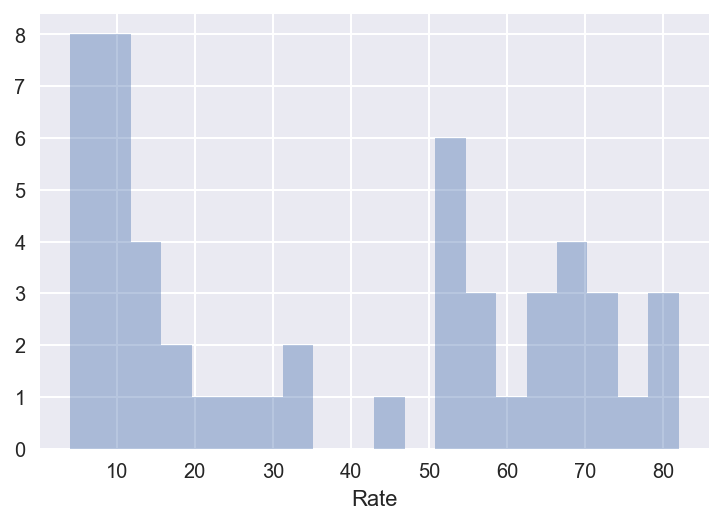

In [20]:
#Rate

plot = sns.distplot(df_rate, bins=20, kde=False)

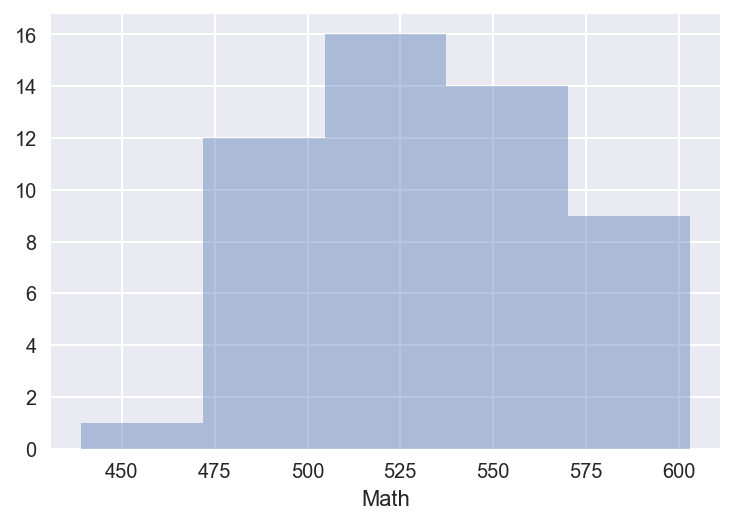

In [21]:
#Math
plot = sns.distplot(df_math, bins=5, kde=False)

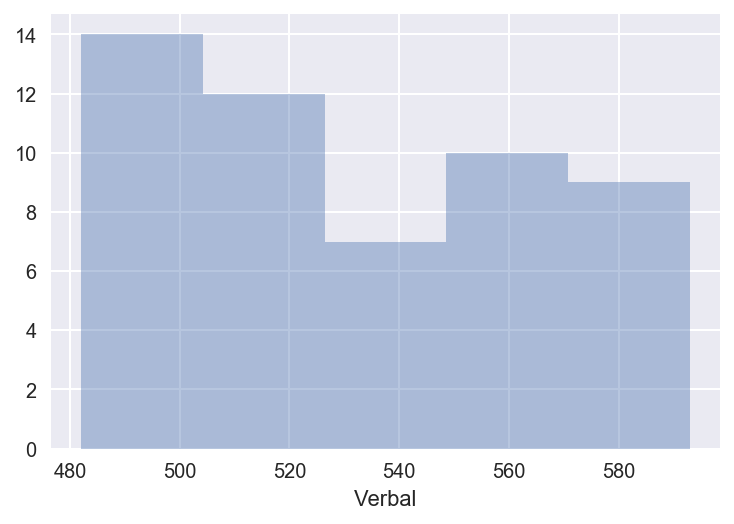

In [22]:
#Verbal
plot = sns.distplot(df_verbal, bins=5, kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

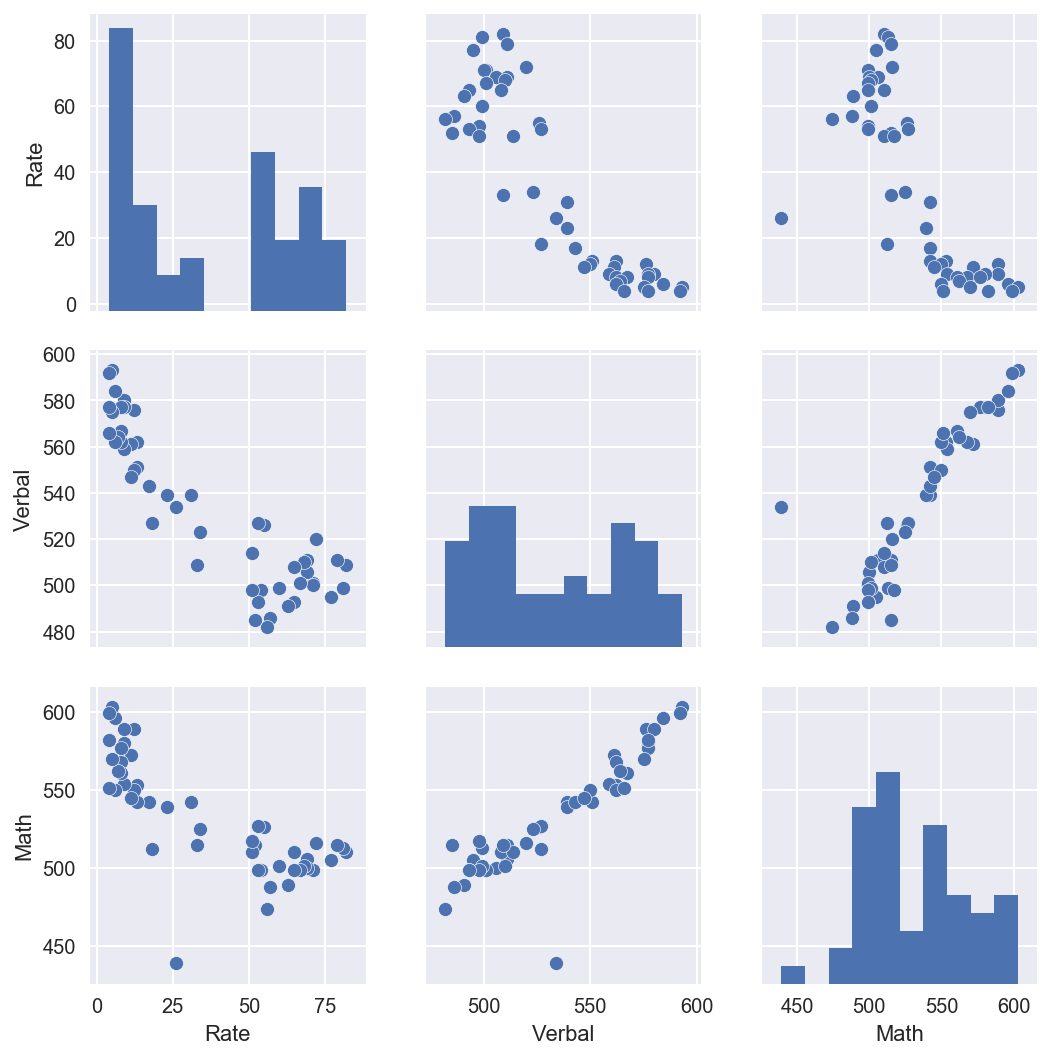

In [23]:
plot = sns.pairplot(sat)

**Findings:**

* High scores in Math and high scores in Verbal are positively correlated.
* Participation rate and high scores in both subjects are negatively correlated.
* There are states that performed extremely low in Math and and did average in Verbal (mean Verbal: 532). 
* No states that performed high in Math performed low in Verbal.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

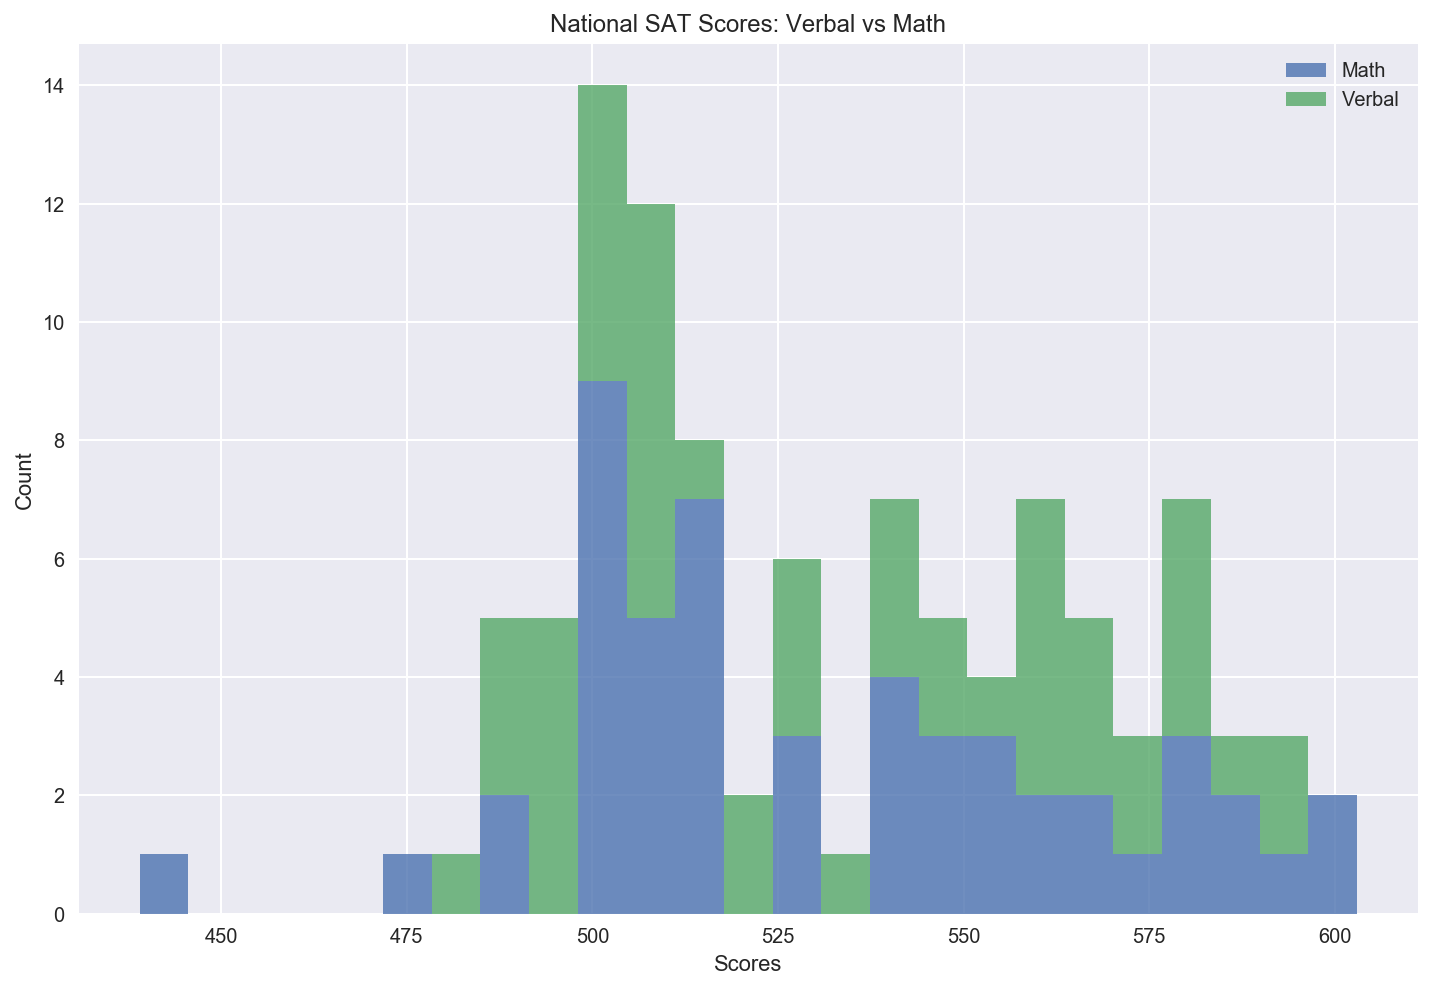

In [24]:
dfmv = pd.DataFrame({'Math': sat['Math'], 
                     'Verbal': sat['Verbal']}, 
                    columns=['Math', 'Verbal'])

plot = dfmv.plot.hist(alpha=0.8, stacked=True, bins=25, figsize=(12,8), 
               title = 'National SAT Scores: Verbal vs Math').set(xlabel="Scores", ylabel="Count")

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

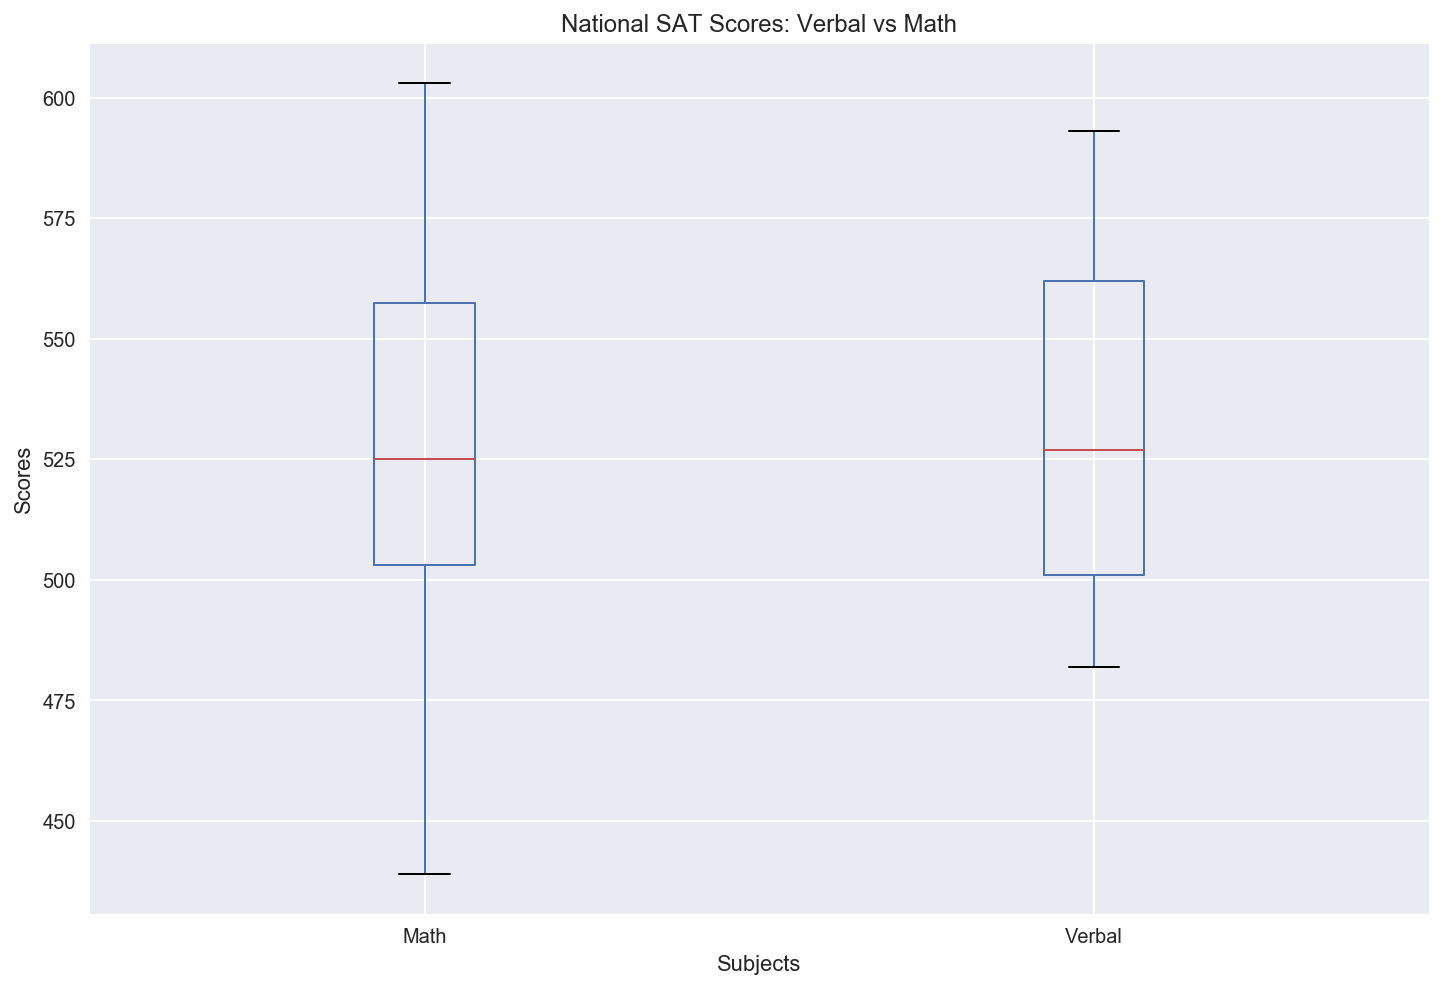

In [25]:
plot = dfmv.plot.box(figsize=(12,8), grid=True, title = 'National SAT Scores: Verbal vs Math')\
.set(xlabel="Subjects", ylabel="Scores")

**A:** 
The benefit of using boxplot is that we can immediately see the mean, min and max of the subject data. For instance in the boxplot above we can see that the national mean for `Verbal` is higher than `Math`.

*What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?*

**A:** In `Math` and `Verbal` columns, we are comparing scores. Whereas `Rate` is a percentage. When we put them together in a boxplot, it would seem like we are comparing the same measurement. 

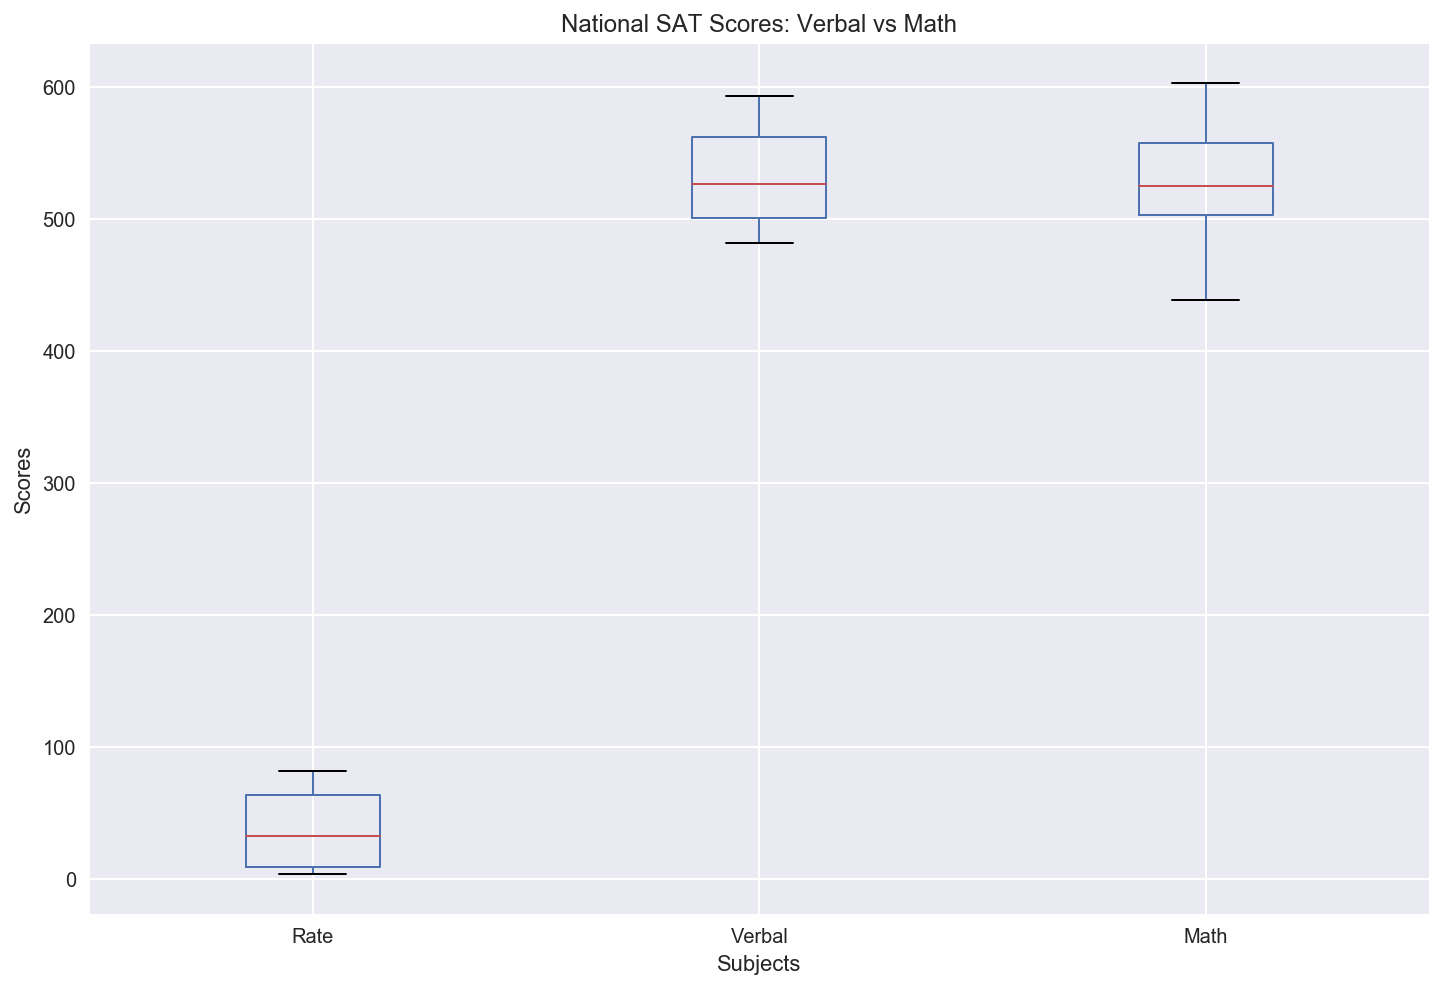

In [26]:
plot = sat.plot.box(figsize=(12,8), grid=True, title = 'National SAT Scores: Verbal vs Math')\
.set(xlabel="Subjects", ylabel="Scores")

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


**A:**

One way to do this is that can standardize the data into Z scores. 
The purpose of doing this is to put everything in units relative to the standard deviation of the sample.

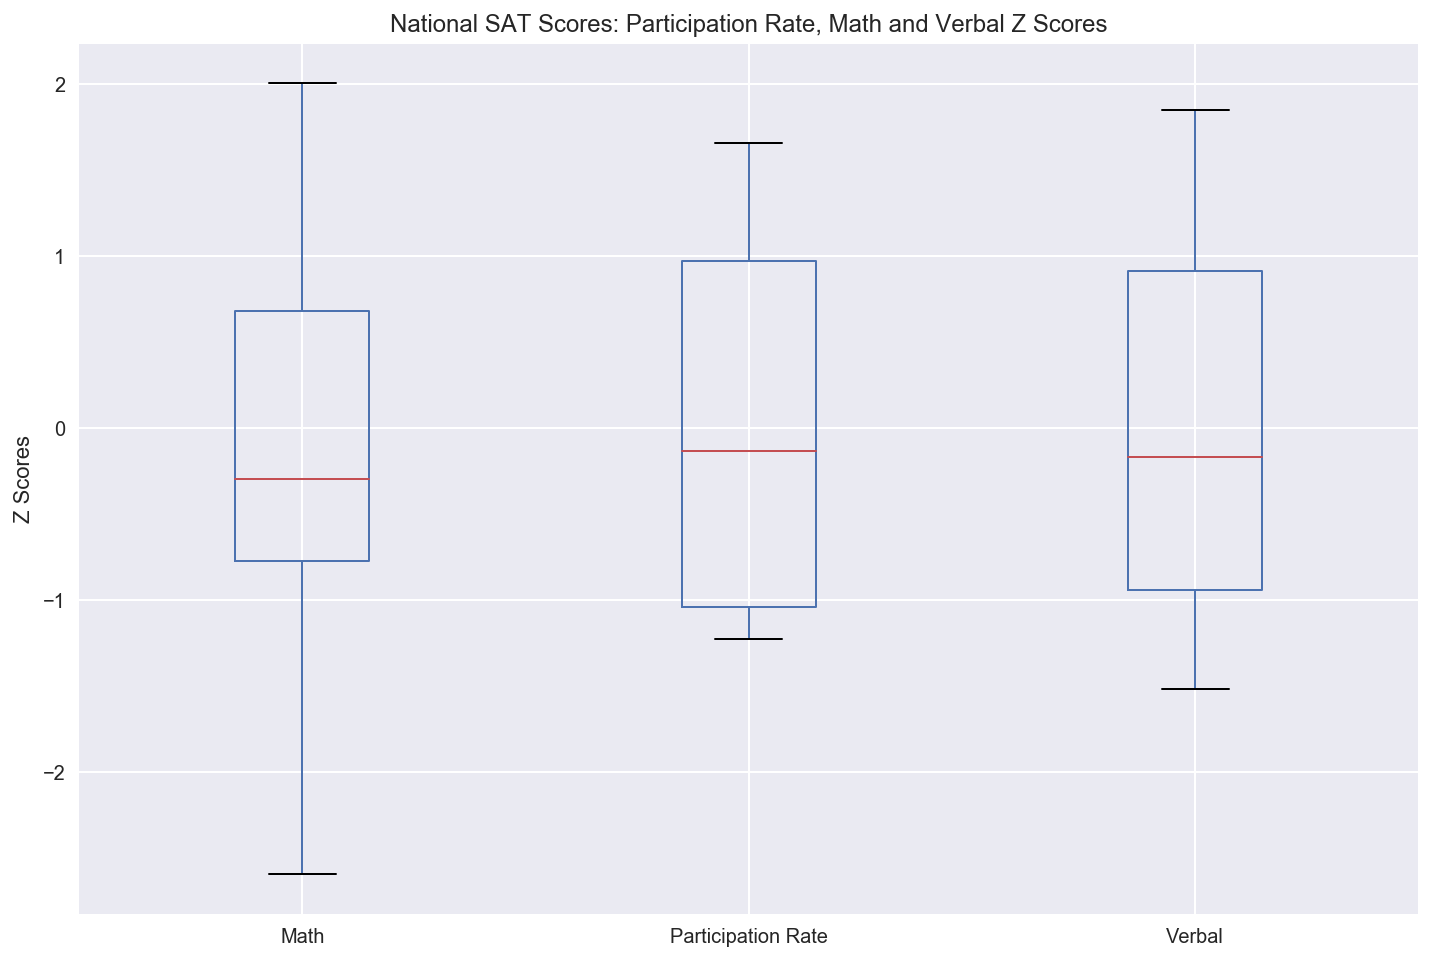

In [27]:
from scipy import stats
d = {'Participation Rate': stats.zscore(df_rate), 'Math': stats.zscore(df_math), 'Verbal' : stats.zscore(df_verbal)}
z_df = pd.DataFrame(d)
plot = z_df.plot.box(figsize=(12,8), grid=True, title = 'National SAT Scores: Participation Rate, Math and Verbal Z Scores')\
.set(ylabel="Z Scores")

From the boxplots above, we can see the spread of the datasets, with Math having the most varied data distribution. 

**Another way to look at the problem:** 

*(Although this may not be what the question is looking for, this also answer the question of plotting all three variables by changing them in a chart and I think this is more interesting)* 

We want to find out if it's true that participation rate is not a good indication of motivation to study. 

We assume that higher score = more motivated to study. 

One possible way to show that is to find out if it's true: *states with lower participation rate has high scores.* 

I will show the average for scores for two categories: below average participation rate and above average participation rate. **Then, we can plot the three variables in one boxplot chart with two columns as comparison.**

In [28]:
#Average participation rate
avg_rate = np.mean(df_rate)

#Splitting the observations into two groups: 
#A for above average participation rate, 
#B for below average participation rate.

sat_a = sat.copy()

df_group = []

for r in sat['Rate']:
    if r > avg_rate:
        df_group.append('A')
    else:
        df_group.append('B')

sat_a['Group'] = df_group

In [29]:
import matplotlib.pyplot as plt

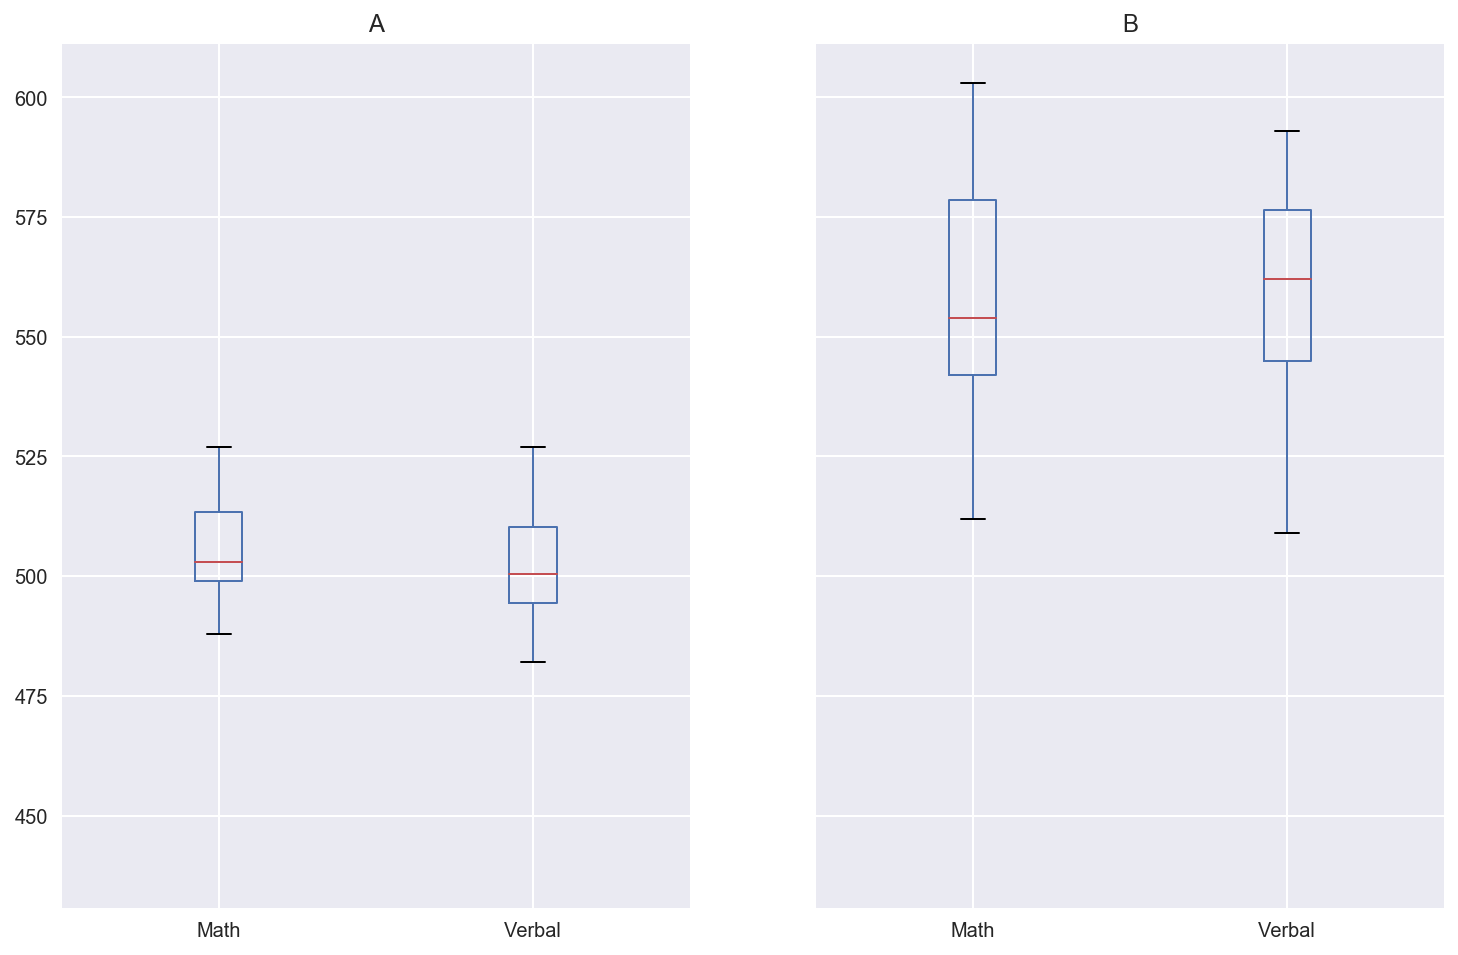

In [30]:
#Boxplot for the two groups: 
grouped = sat_a.groupby('Group')
plot = grouped.boxplot(column=['Math', 'Verbal'], figsize=(12,8), grid=True)

`Group A` represents `States` with `Participation Rate` **ABOVE** National Average (37%)

`Group B` represents `States` with `Participation Rate` **BELOW** National Average (37%)

We can conclude that `Group B` has higher scores than `Group A` in both Math and Verbal.

**POSSIBLE Explanations:**
* There are more students in `Group A` as the states are larger.  
* `Group A` may include students who don't perform well overall in school, but still take SAT due to circumstances such as peer pressure or school requirements.
* There are less but more diverse students in `Group B`.
* Students in `Group B` took the SAT because they are confident of their academic performance. 
* Students in `Group B` may come from lower socio economic background hence they have higher motivation to get into good universities, thus they work harder to do well in the SAT.

**How can this dataset help the Mayor?**
* Moving forward, perhaps the Mayor need to look into data from students in `Group B` and analyze why their score is higher, especially in math!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [31]:
verbal_avg = sat['Verbal'].mean()
verbal_avg

532.5294117647059

In [32]:
verb_a_avg = sat[sat.loc[:,'Verbal']>verbal_avg]
verb_a_avg['State'].count()

24

In [33]:
verbal_a_avg = sat.loc[(sat['Verbal'] > verbal_avg), :]
verbal_a_avg['State']

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [34]:
print('Number of states with verbal scores above average: {}.'.format(verbal_a_avg['State'].count()))

Number of states with verbal scores above average: 24.


**A**: 24 states scored above the verbal mean. 

This translates to 47% of the participants performed above average in the SAT Verbal section.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [35]:
verbal_med = sat['Verbal'].median()
verbal_med

527.0

In [36]:
verbal_a_med = sat.loc[(sat['Verbal'] > verbal_med), :]
verbal_a_med['State']

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [37]:
print('Number of states with verbal scores above median: {}'.format(verbal_a_med['State'].count()))

Number of states with verbal scores above median: 24


**A**: 24 states scored above the verbal median. 

This translates to 47% of the participants performed above the median in the SAT Verbal section.

The result is the same with the mean - thus very likely that the SAT Verbal Scores is normally distributed.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [38]:
sat_b = sat.copy()

In [39]:
sat_b['Difference'] = sat_b['Verbal'] - sat_b['Math']

In [40]:
sat_b.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [41]:
#Verbal Greater than Math

v_greater = sat_b[sat_b['Difference'] > 0].sort_values(by=['Difference'], ascending=False)
v_greater = v_greater[:10]
v_greater.loc[:,['State','Verbal','Math','Difference']].head(3)

,State,Verbal,Math,Difference
27,OH,534,439,95
29,WV,527,512,15
50,MS,566,551,15


In [42]:
#Math Greater than Verbal

m_greater = sat_b[sat_b['Difference'] < 0].sort_values(by=['Difference'], ascending=True)
m_greater = m_greater[:10]
m_greater.loc[:,['State','Verbal','Math','Difference']].head(3)

,State,Verbal,Math,Difference
21,HI,485,515,-30
23,CA,498,517,-19
1,NJ,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [43]:
import seaborn as sns; sns.set()

In [44]:
#Calculating the correlation

sat_c = sat.loc[:,['Rate','Verbal','Math']]
corr = sat_c.corr()
corr

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


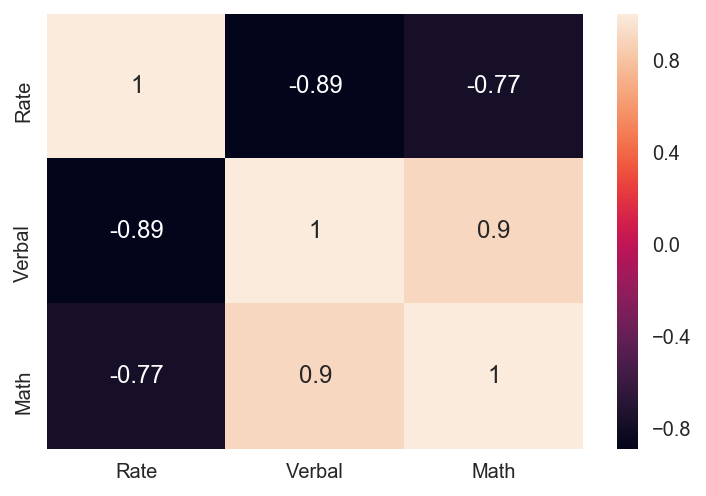

In [45]:
#Mapping the heatmap

sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [46]:
math_verbal = np.corrcoef(df_math, df_verbal)[0, 1]
print('The Pearson correlation coefficient for Math and Verbal is {}'.format(math_verbal))

The Pearson correlation coefficient for Math and Verbal is 0.899870852544429


**A:** Those that scored high in verbal and math are positively correlated.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [47]:
sat.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


**A**

`Count`: The Rate, Verbal and Math columns has 51 Obsercations

`Mean`: The average participation rate is 37%, average verbal score is 532, average math score is 531

`Standard Deviation (std)`: The standard deviation for Rate is 27%, for verbal is 33, for math is 36. This means that 68% of the data is +/-1std away from the average, 95% of the data is +/-2std away from average and 99.7% of the data is +/- 3std away from average. We can prove this, for instance, the highest score for math is *603*, which is within 3std away from the mean (513 + (3x36) = 621). 

`Min`: The lowest value in the series.

`25%`: 25% percent of the data

`50%`: 50% percent of the data, or the median.

`75%`: 50% percent of the data, or the median.

`Max`: The highest value in the series. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

* Describe how the covariance matrix is different from the correlation matrix.

**A:** Both covariance and correlation indicate whether variables are positively or inversely related. Correlation also tells you the degree to which the variables tend to move together.

* What is the process to convert the covariance into the correlation?

**A:** To convert covariance into correlation, we divide covariance by the sample standard deviation. 

* Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

**A:** In addition to telling you whether variables are positively or inversely related, correlation also tells you the degree to which the variables tend to move together.

In [48]:
cov_df = sat[['Rate', 'Verbal', 'Math']].cov()
cov_df

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [49]:
drug = pd.read_csv('../project-2/drug-use-by-age.csv', sep=',')

In [50]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [51]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

**Data Cleaning**

* No data missing, that's good. 
* Age, cocaine-frequency, crack-frequency, heroin-freqency, inhalant-frequency, oxycontin-frequency and meth frequency are objects when they are supposed to be float. Let's find out why.

In [52]:
#Find out what causes the variables above typed as objects
drug['age'].unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [53]:
#Seems that the age dataset shows range '-', we'll cast this as categorical data then. 
drug['age'] = drug['age'].astype('category')

In [54]:
#Find out what causes the rest of the variables above typed as objects

drug['cocaine-frequency'].unique()

array(['5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0', '15.0', '36.0',
       '-'], dtype=object)

In [55]:
drug.loc[:,['age','n','cocaine-use','cocaine-frequency']]

,age,n,cocaine-use,cocaine-frequency
0,12,2798,0.1,5.0
1,13,2757,0.1,1.0
2,14,2792,0.1,5.5
3,15,2956,0.5,4.0
4,16,3058,1.0,7.0
5,17,3038,2.0,5.0
6,18,2469,3.2,5.0
7,19,2223,4.1,5.5
8,20,2271,4.9,8.0
9,21,2354,4.8,5.0


In [56]:
drug['heroin-frequency'].unique()

array(['35.5', '-', '2.0', '1.0', '66.5', '64.0', '46.0', '180.0', '45.0',
       '30.0', '57.5', '88.0', '50.0', '66.0', '280.0', '41.0', '120.0'],
      dtype=object)

In [57]:
drug.loc[:,['age','n','heroin-use','heroin-frequency']]

,age,n,heroin-use,heroin-frequency
0,12,2798,0.1,35.5
1,13,2757,0.0,-
2,14,2792,0.1,2.0
3,15,2956,0.2,1.0
4,16,3058,0.1,66.5
5,17,3038,0.1,64.0
6,18,2469,0.4,46.0
7,19,2223,0.5,180.0
8,20,2271,0.9,45.0
9,21,2354,0.6,30.0


In [60]:
drug['inhalant-frequency'].unique()

array([19. , 12. ,  5. ,  5.5,  3. ,  4. ,  2. ,  3.5, 10. , 13.5,  nan])

In [62]:
#OK we get the idea. Let's clean up '-' 
drug.iloc[:,2:] = drug.iloc[:,2:].replace('-', np.nan).astype('float')

In [63]:
drug.loc[:,['age','n','inhalant-use','inhalant-frequency']]

,age,n,inhalant-use,inhalant-frequency
0,12,2798,1.6,19.0
1,13,2757,2.5,12.0
2,14,2792,2.6,5.0
3,15,2956,2.5,5.5
4,16,3058,3.0,3.0
5,17,3038,2.0,4.0
6,18,2469,1.8,4.0
7,19,2223,1.4,3.0
8,20,2271,1.5,4.0
9,21,2354,1.4,2.0


In [64]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [65]:
drug.shape

(17, 28)

In [66]:
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [67]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null category
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxyco

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [68]:
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [82]:
#Let's define the data in dictionary

drug_dict = {"n": "the sample size of the age group.", 
             "x-use": "the percentage of drug use in an age group in the past 12 months",
             "x-frequency" : "the median number of times a user in an age group use drug in the past 12 months"}

In [69]:
#Wait a minute. With the assumption above, some of the drugs' information looks weird! 

drug.loc[:,['age','n','heroin-use', 'heroin-frequency', 'stimulant-use', 'stimulant-frequency', 'sedative-use', 'sedative-frequency']]

,age,n,heroin-use,heroin-frequency,stimulant-use,stimulant-frequency,sedative-use,sedative-frequency
0,12,2798,0.1,35.5,0.2,2.0,0.2,13.0
1,13,2757,0.0,NaN,0.3,4.0,0.1,19.0
2,14,2792,0.1,2.0,0.8,12.0,0.2,16.5
3,15,2956,0.2,1.0,1.5,6.0,0.4,30.0
4,16,3058,0.1,66.5,1.8,9.5,0.2,3.0
5,17,3038,0.1,64.0,2.8,9.0,0.5,6.5
6,18,2469,0.4,46.0,3.0,8.0,0.4,10.0
7,19,2223,0.5,180.0,3.3,6.0,0.3,6.0
8,20,2271,0.9,45.0,4.0,12.0,0.5,4.0
9,21,2354,0.6,30.0,4.1,10.0,0.3,9.0


* Look at heroin, stimulant and sedative uses for age 65+, how can the average use being '0' and the frequency positive? Either a) assumptions must be wrong or b) the data is wrong or c) these are hospital administered drugs for medical or treatment purposes, thus excluded from 'use', which is possible given the age group.  
* Because I don't have more information about the data, I won't alter the data and assume c - these are hospital administered druges for medical or treatment purposes.

**PROBLEMS**

To find out: 
1. What is the most commonly abused drug across all age groups? 
2. Are there any correlation between the use of one drug to another? 

**1. What is the most commonly abused drug across all age groups?**

In [136]:
drug_use = drug.loc[:,['age','alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 
                        'inhalant-use','pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use',
                        'meth-use','sedative-use']]

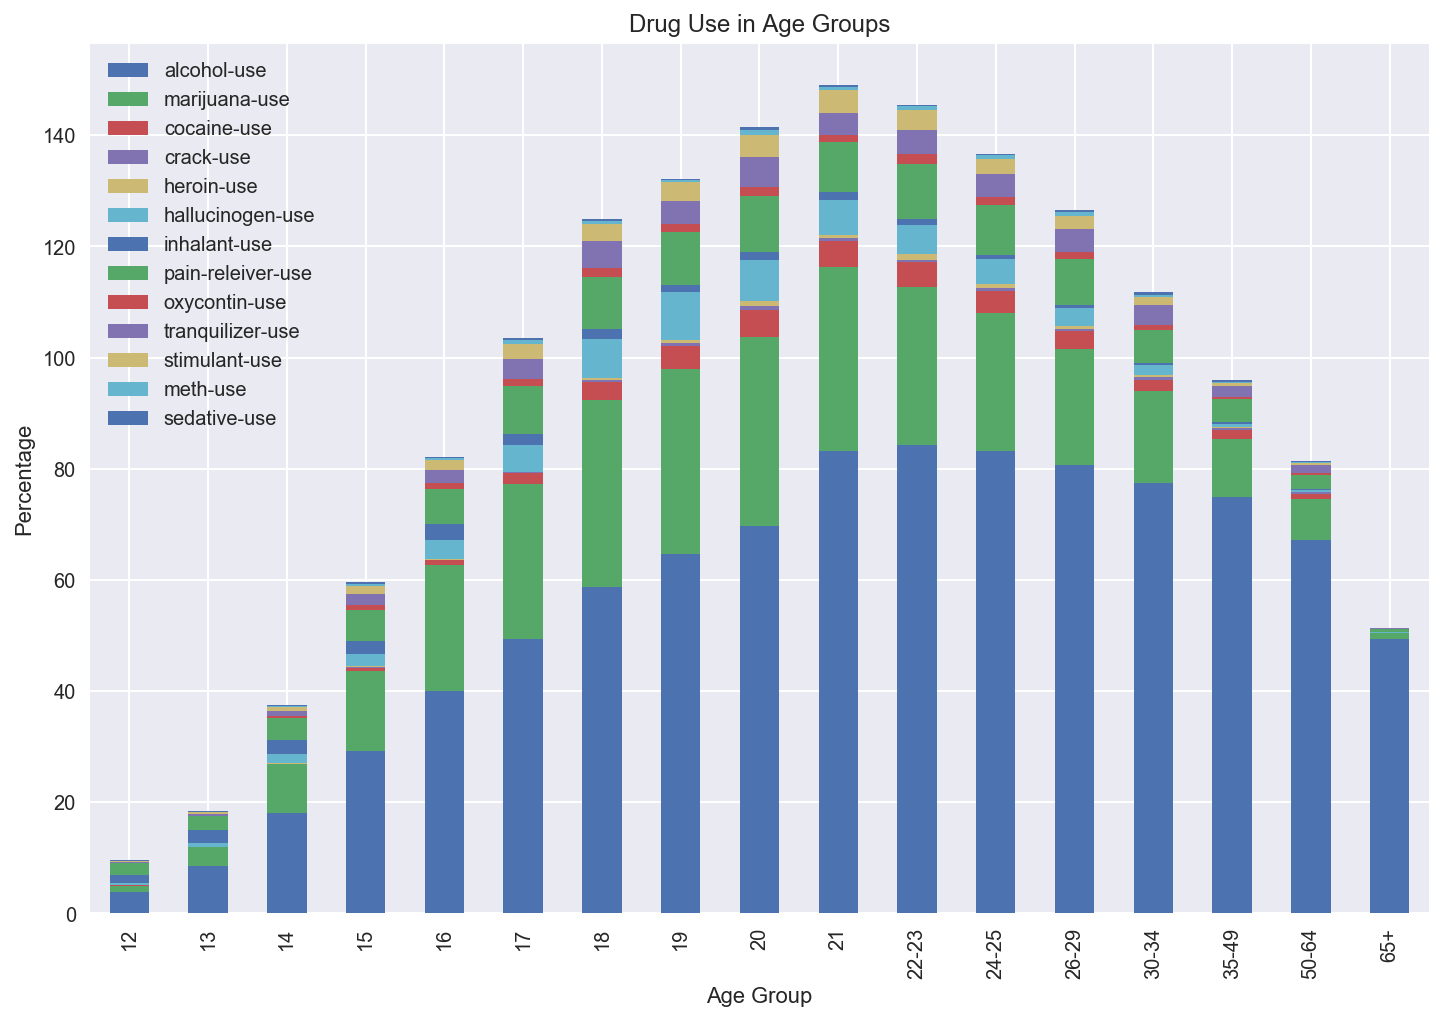

In [135]:
drug_use_plot = drug_use.set_index('age').plot(kind='bar', stacked=True, figsize=(12,8),
                                                       title='Drug Use in Age Groups').set(
    ylabel='Percentage', xlabel='Age Group')

Seems like the most common drug is alcohol followed by marijuana. The chart above is not very insightful though, so I group the drugs into two categories: stimulant and depressants to answer 7.3

In [137]:
drug_freq = drug.loc[:,['age','alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency', 
                             'hallucinogen-frequency', 'inhalant-frequency','pain-releiver-frequency', 'oxycontin-frequency', 
                             'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency','sedative-frequency']]

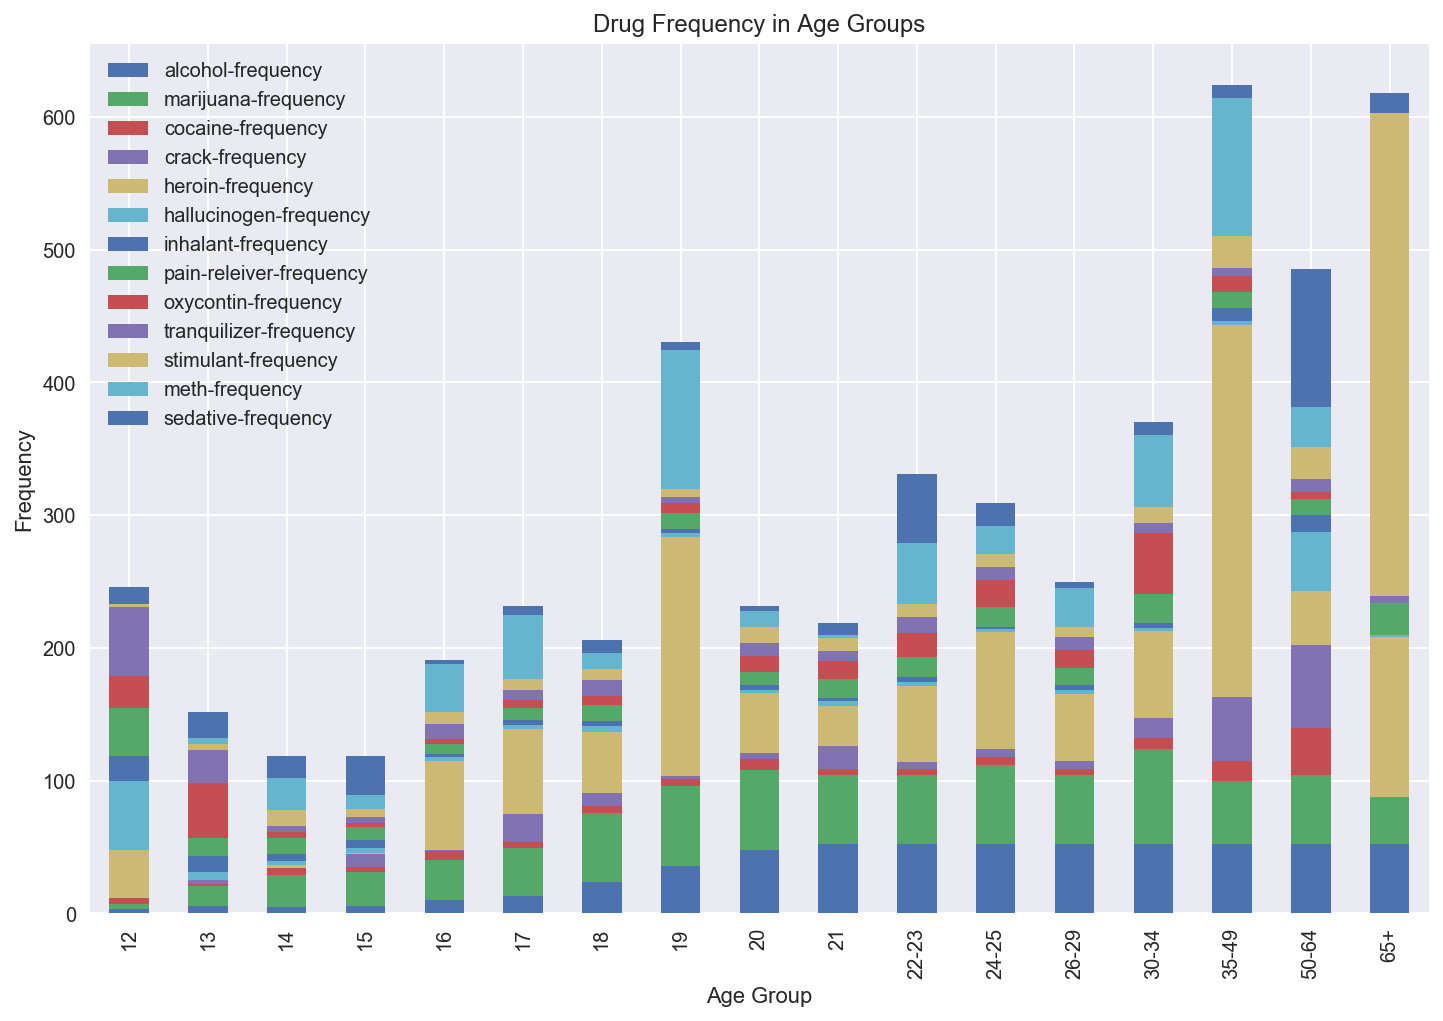

In [139]:
drug_freq_plot = drug_freq.set_index('age').plot(kind='bar', stacked=True, figsize=(12,8),
                                                       title='Drug Frequency in Age Groups').set(
    ylabel='Frequency', xlabel='Age Group')

Interestingly, although alcohol and marijuana is the most commonly used drug, they are used at low frequency!

**2. Are there any correlation between the use of one drug to another?**

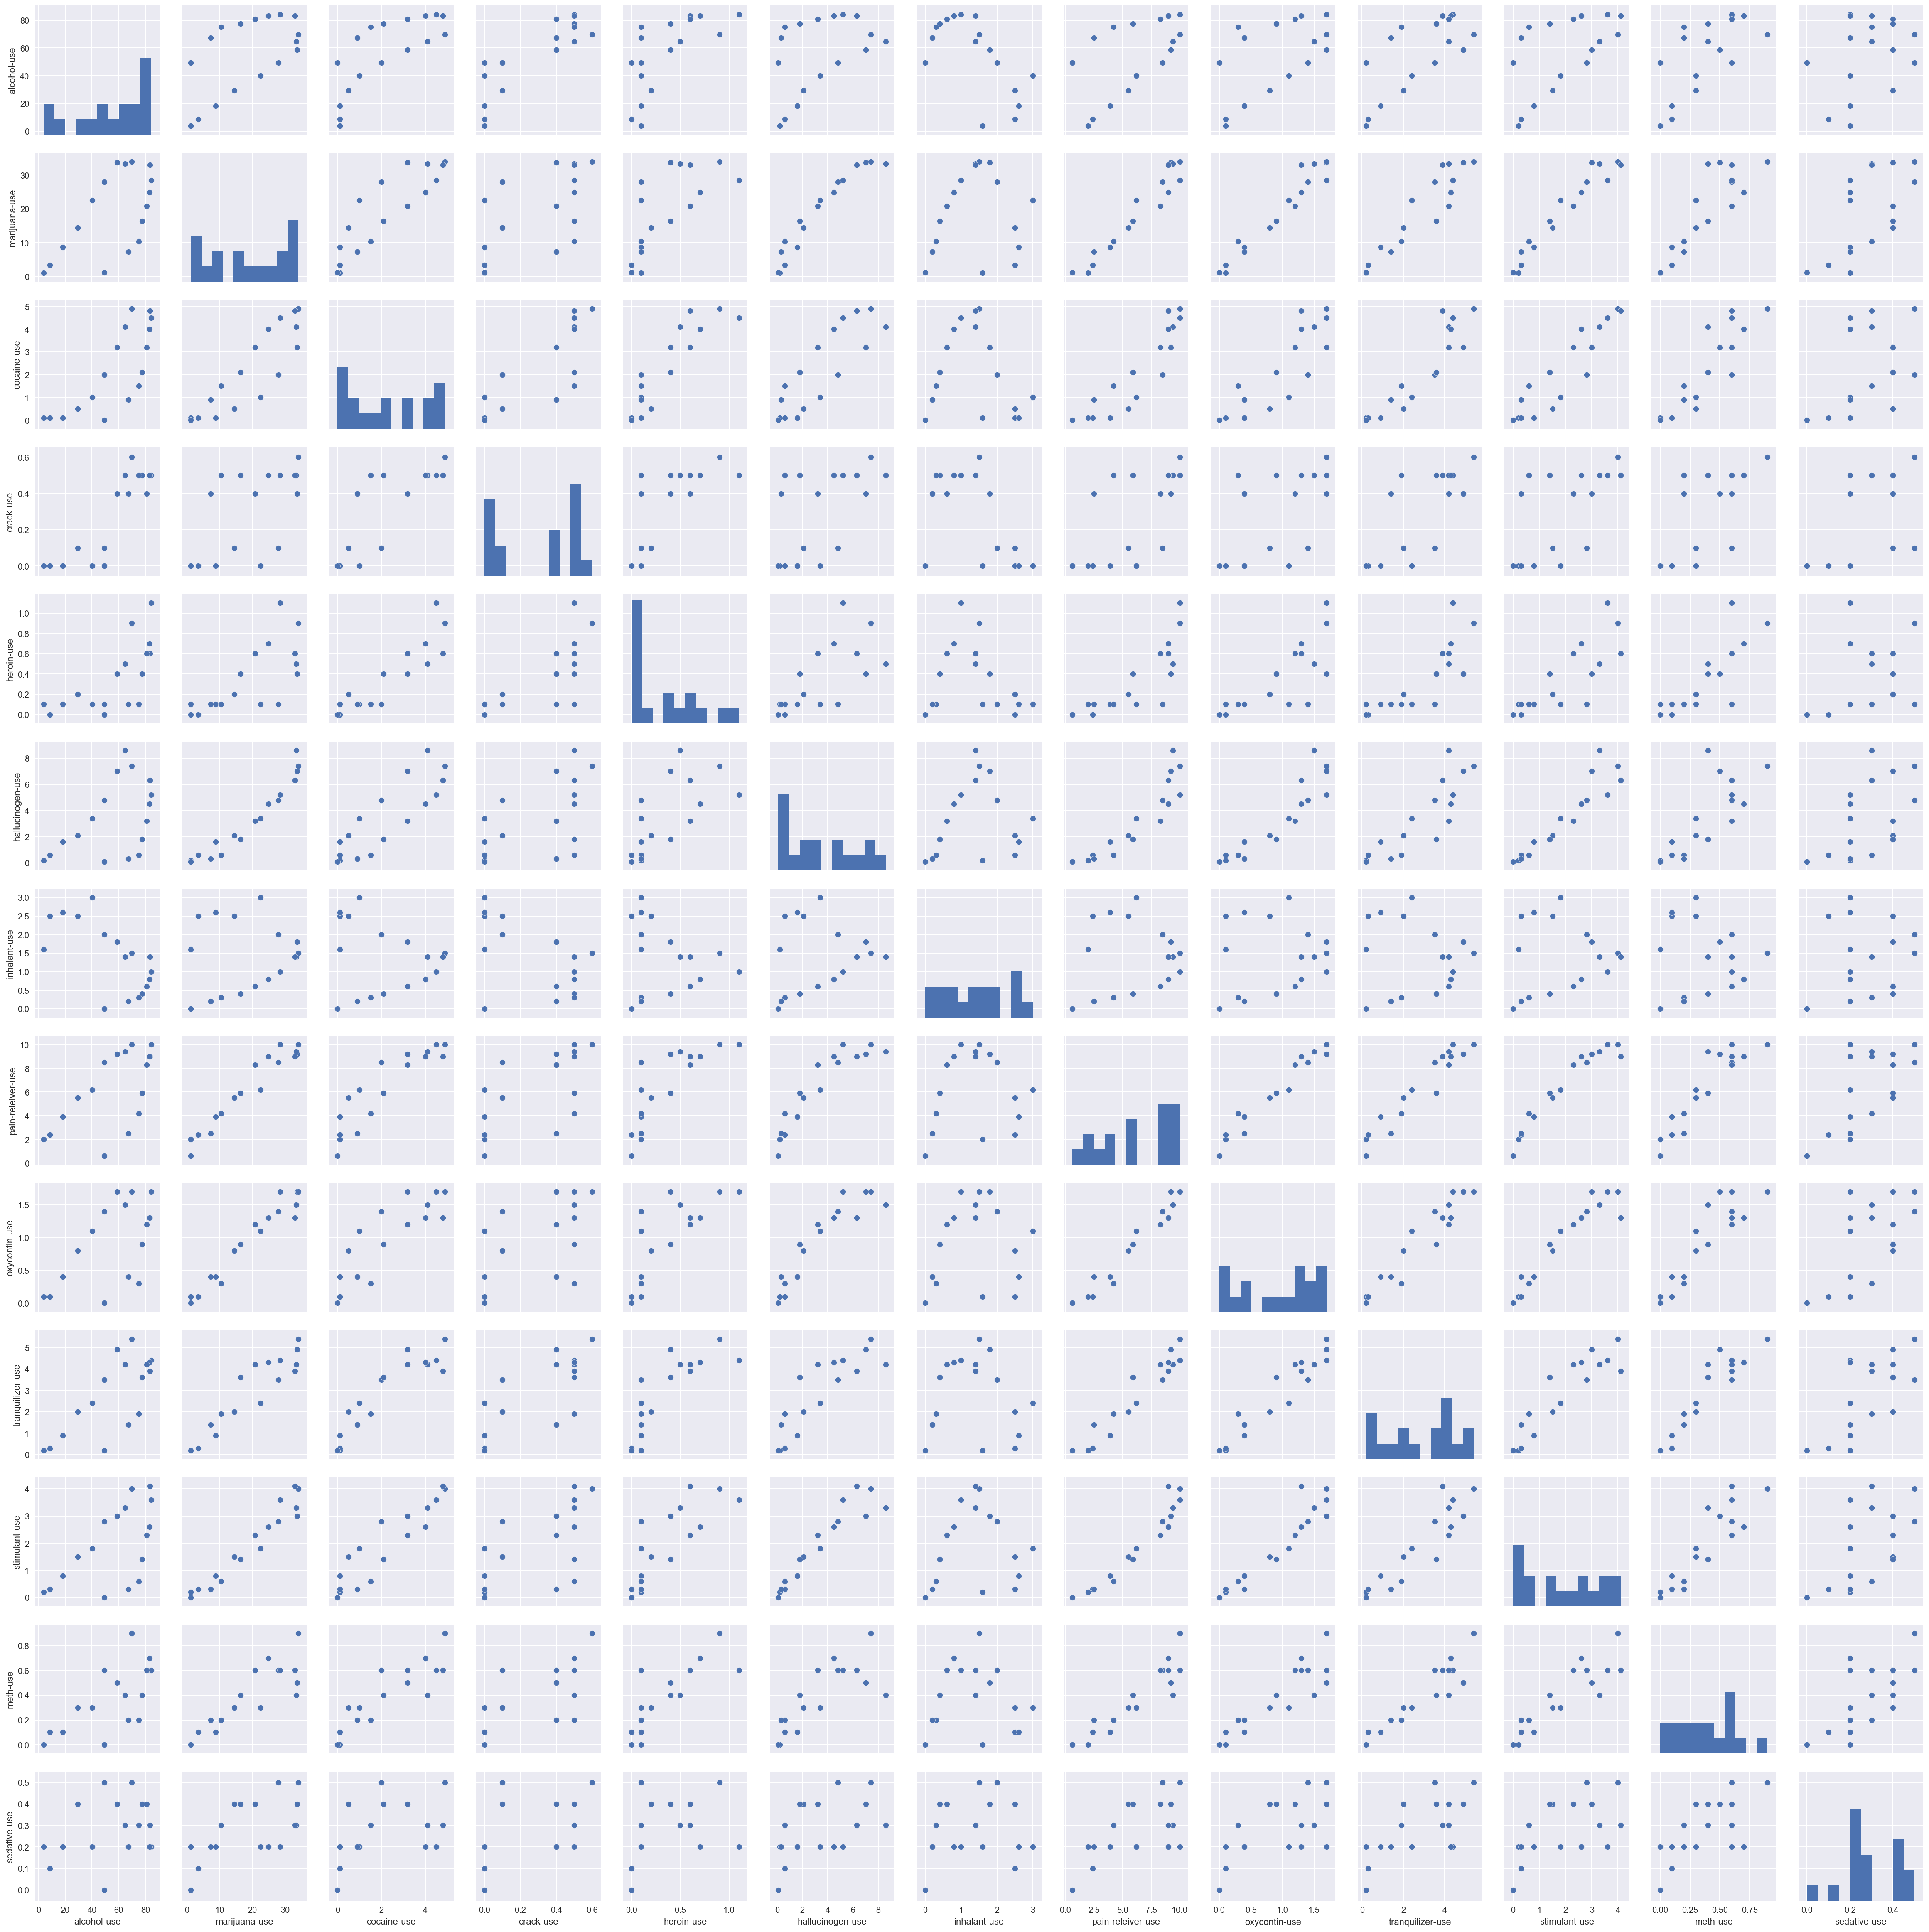

In [74]:
plot = sns.pairplot(drug_use)

In [74]:
#Wow, many looks like they have positive correlation! Let's try to find out with correlation matrix.
drug_corr = drug_use.corr()
drug_corr

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen-use,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant-use,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain-releiver-use,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin-use,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929
tranquilizer-use,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618


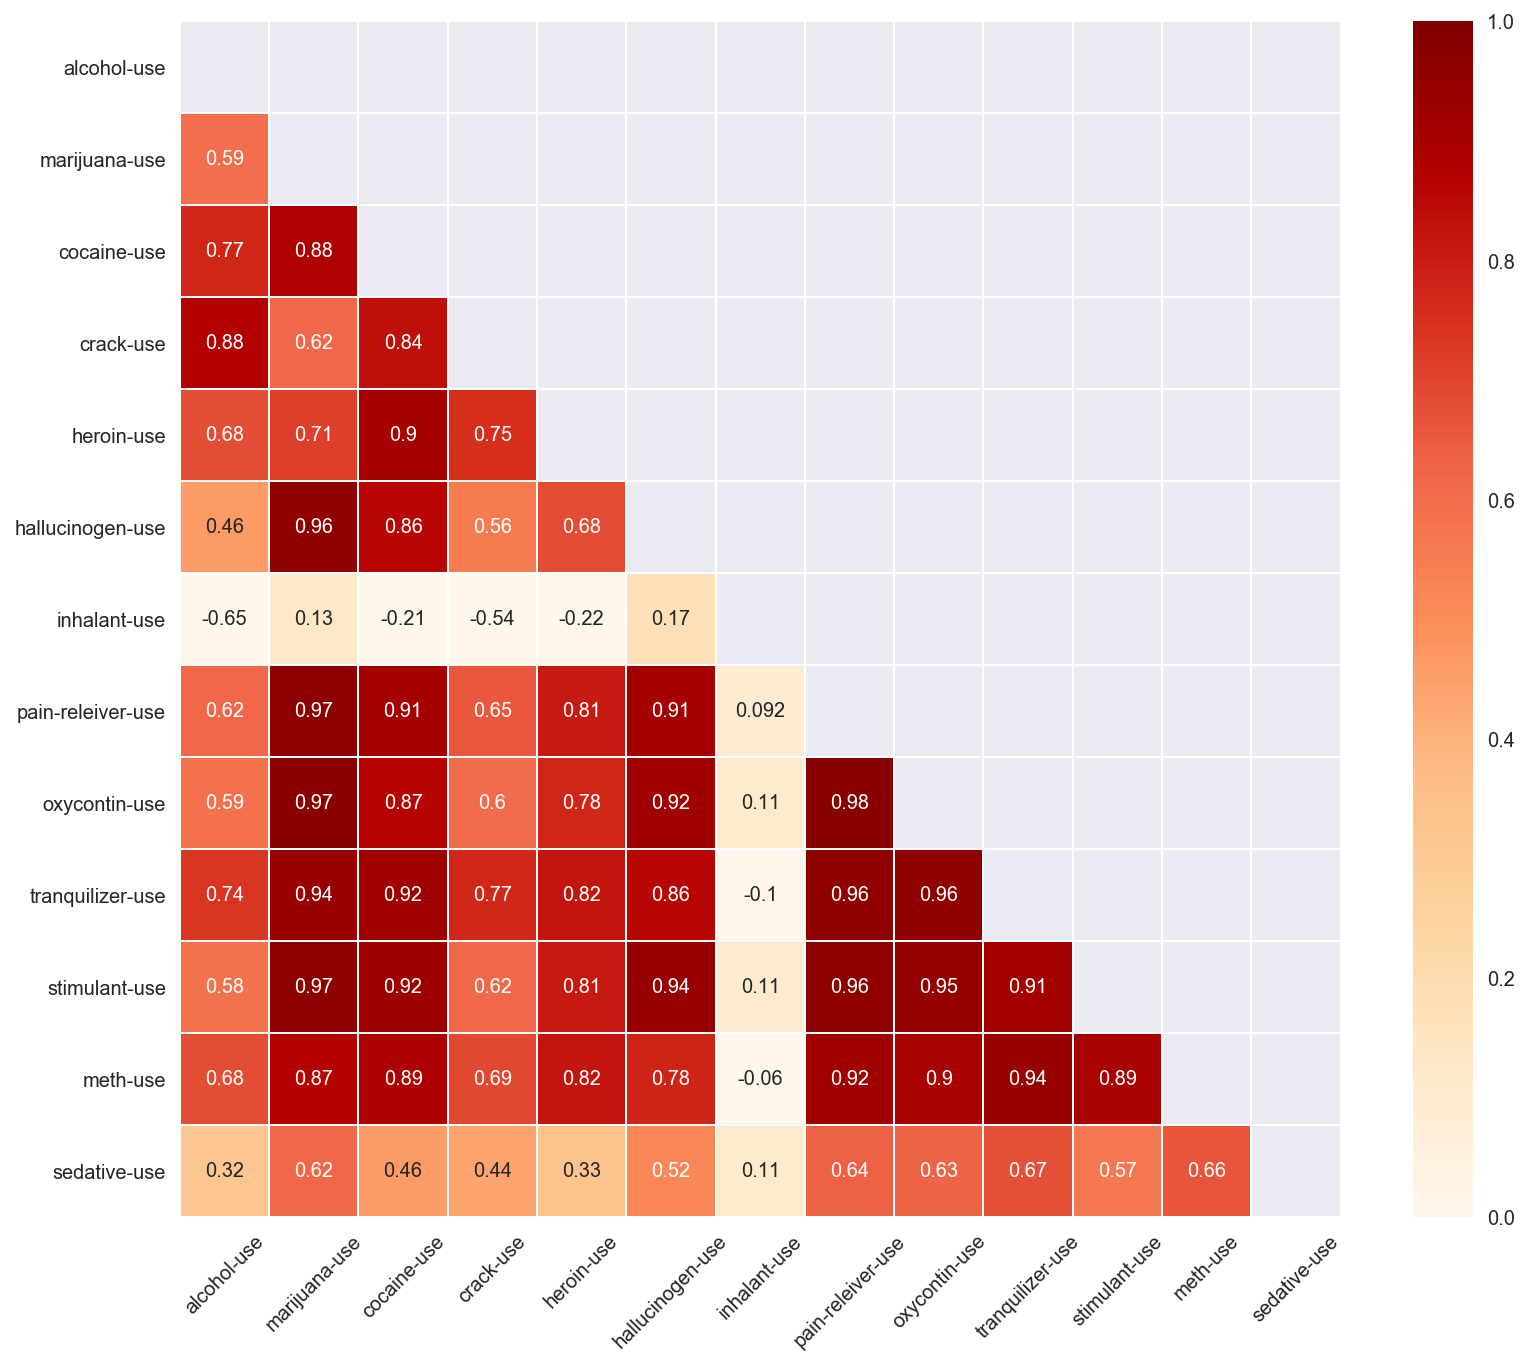

In [79]:
fig, ax = plt.subplots(figsize=(13,11))

mask = np.zeros_like(drug_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

drug_map = sns.heatmap(drug_corr, annot=True, cmap="OrRd", mask=mask, vmin=0, vmax=1,
            linewidths=0.5, xticklabels=drug_corr.columns, yticklabels=drug_corr.columns).set_xticklabels(drug_map.get_xticklabels(), rotation=45)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

---------------------

**Notes: Drug Groups and Drugs Excluded from Observation**
1. Marijuana, Oxycontin, Pain Reliever, Tranquilizer, Heroin, Sedative, Alcohol are depressants or pain relief drugs. 
    1. Marijuana has high correlation with other drugs, namely Hallucinogen, Pain Reliever, Oxycontin, Tranquilizer and Stimulant. 
    2. Pain Reliever has high correlation with other drugs, such as meth, stimulant, tranquilizer, oxycontin, cocaine, marijuana and hallucinogen. 
    3. Although alcohol is also a depressant, alcohol is so common that health experts classify alcohol-related problems separately. For the same reason we'll exclude alchohol from the observation.
    4. Regular use of these drugs often leads to "drug tolerance." That is, the body adjusts to them and it takes a higher and higher dose to achieve the desired effect

2. Meth, Stimulant, Cocaine, Crack and Inhalants are stimulants. Hallucinogen is psychoactive agent, however microdosing on certain hallucinogens such as psychedelics have been described to produce stimulating effect.  
    1. Inhalants have very low to negative correlation with other drugs, we'll bench inhalants for the time being from our observation.
    2. Hallucinogens have high correlation with a few other drugs, namely stimulant, oxycontin and pain reliever.
    3. Cocaine has pretty high correlation with a few other drugs as well. 

In [84]:
drug_dict

{'n': 'the sample size of the age group.',
 'x-frequency': 'the median number of times a user in an age group use drug in the past 12 months',
 'x-use': 'the percentage of drug use in an age group in the past 12 months'}

In [90]:
# Grouping for stimulants & depressants
d_stimul_use = drug.loc[:,['age','cocaine-use', 'crack-use', 'hallucinogen-use', 'inhalant-use', 'stimulant-use', 'meth-use']]
d_stimul_freq = drug.loc[:,['age','cocaine-frequency', 'crack-frequency', 'hallucinogen-frequency', 'inhalant-frequency', 'stimulant-frequency', 'meth-frequency']]
d_depress_use = drug.loc[:,['age','marijuana-use', 'heroin-use','pain-releiver-use', 'oxycontin-use', 
                             'tranquilizer-use','sedative-use']]
d_depress_freq = drug.loc[:,['age','marijuana-frequency', 'heroin-frequency','pain-releiver-frequency', 'oxycontin-frequency', 
                             'tranquilizer-frequency','sedative-frequency']]

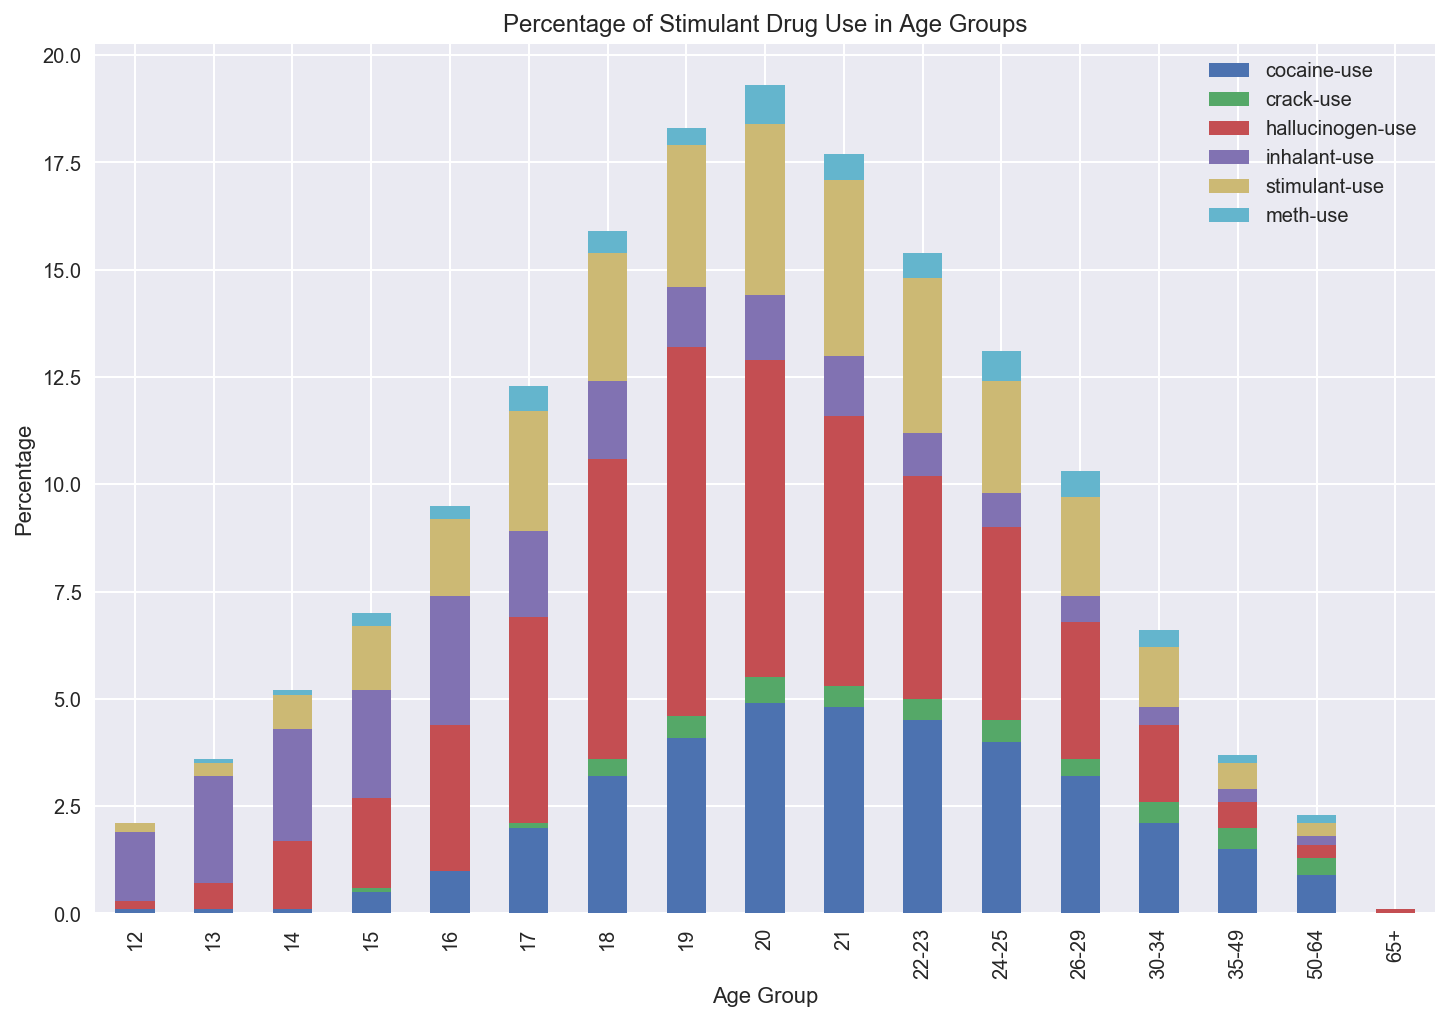

In [121]:
d_stimul_use_plot = d_stimul_use.set_index('age').plot(kind='bar', stacked=True, figsize=(12,8),
                                                       title='Percentage of Stimulant Drug Use in Age Groups').set(
    ylabel='Percentage', xlabel='Age Group')

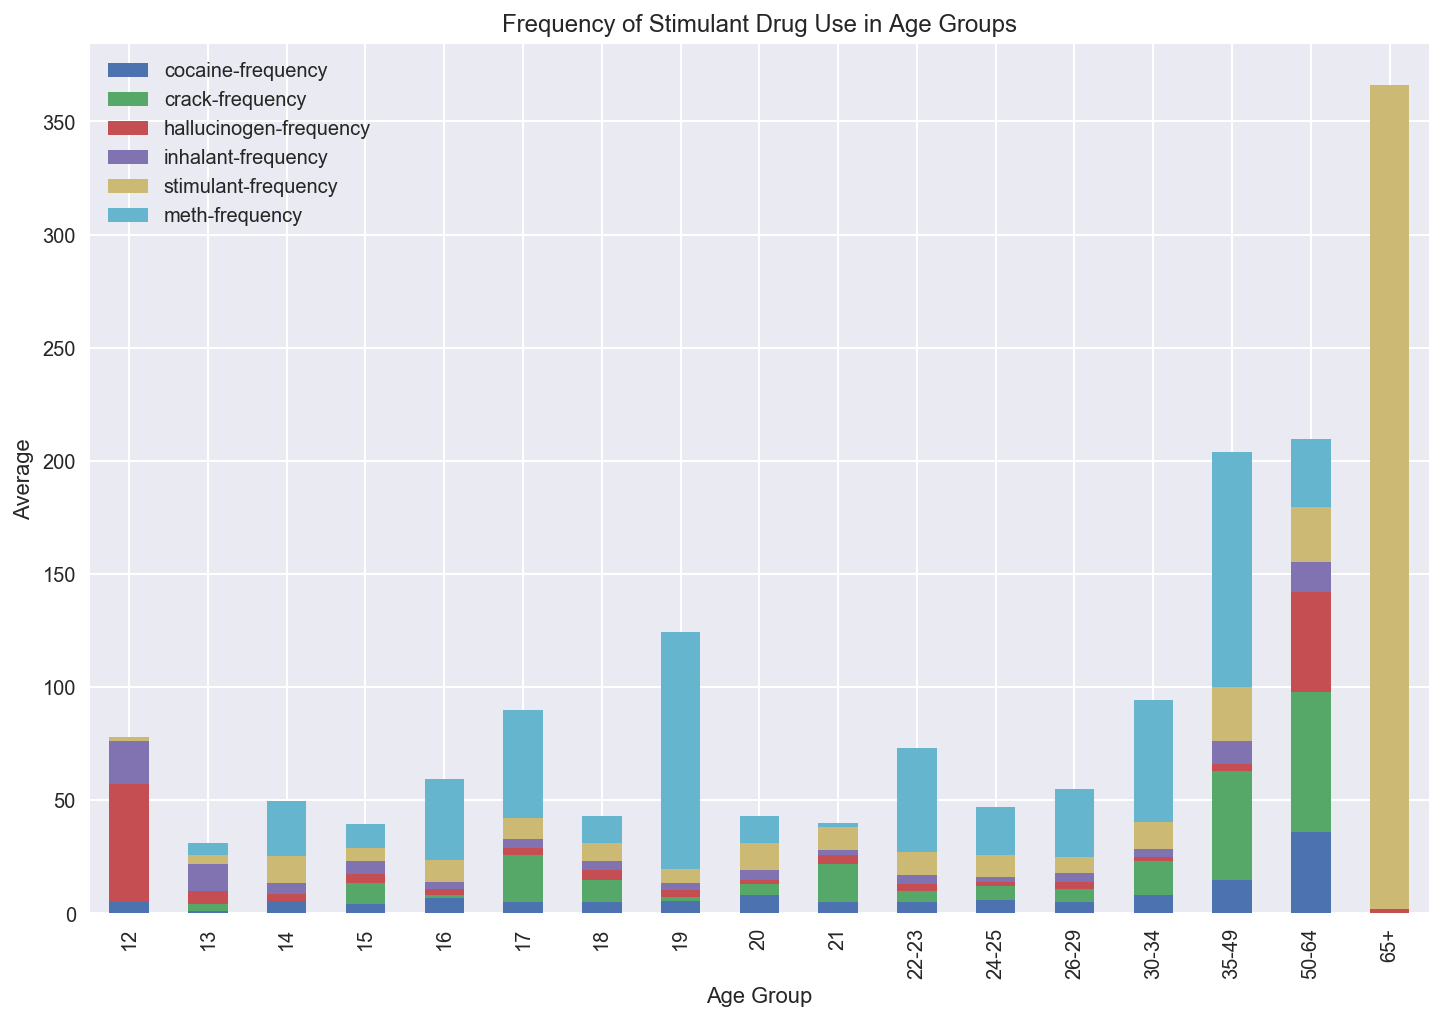

In [125]:
d_stimul_freq_plot = d_stimul_freq.set_index('age').plot(kind='bar', stacked=True, figsize=(12,8), 
                                                          title='Frequency of Stimulant Drug Use in Age Groups').set(
    ylabel='Average', xlabel='Age Group')

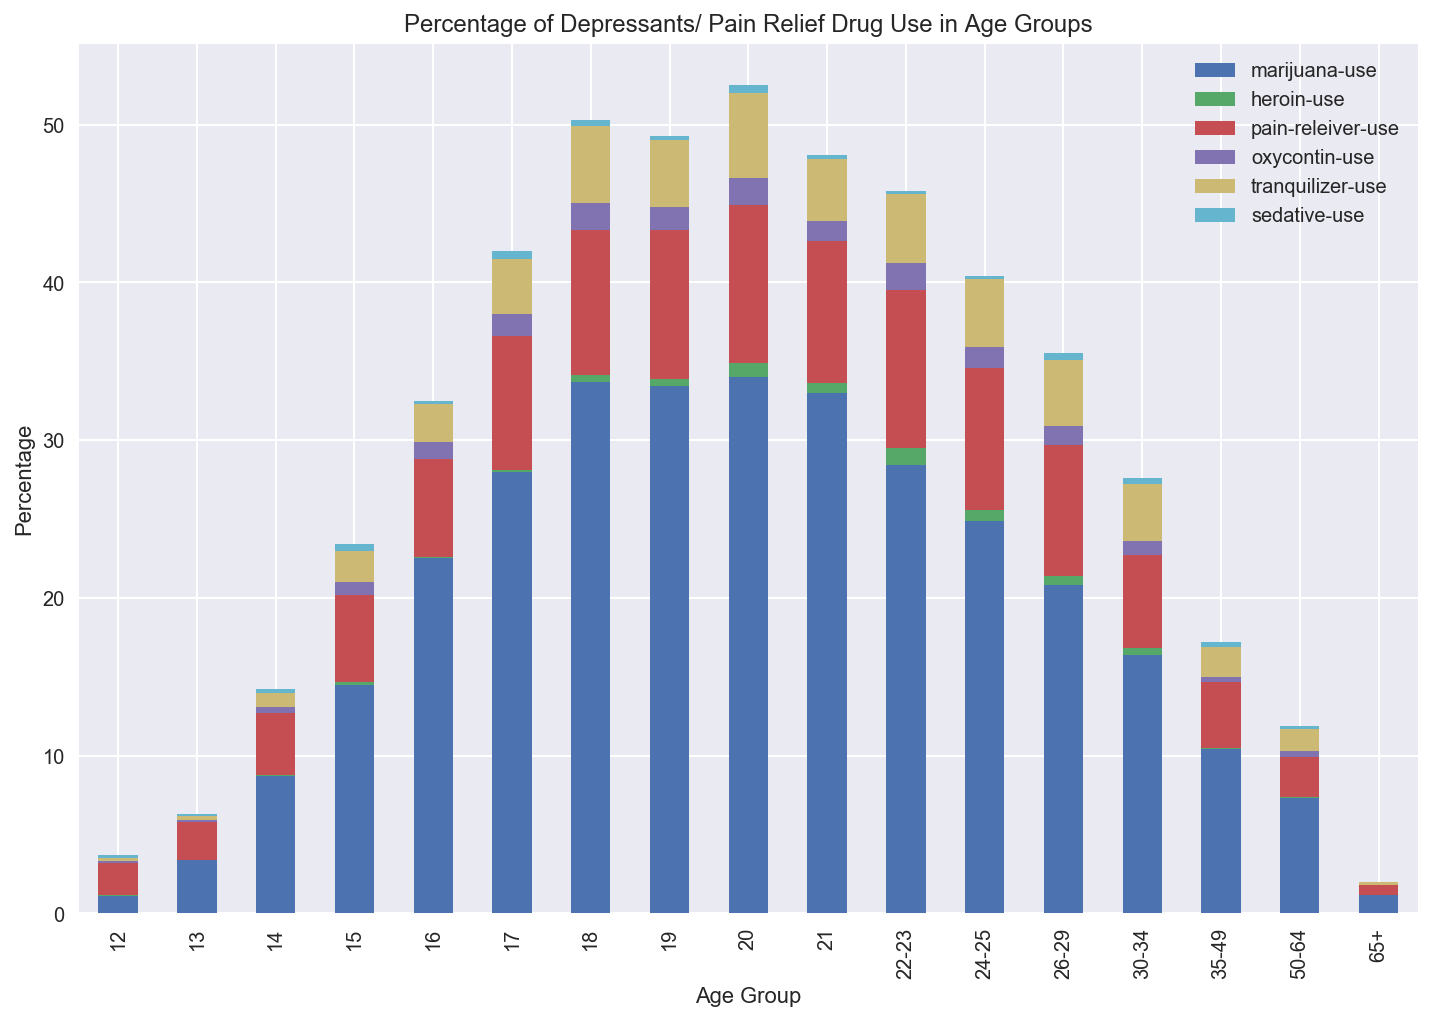

In [126]:
d_depress_use_plot = d_depress_use.set_index('age').plot(kind='bar', stacked=True, figsize=(12,8),
                                                         title='Percentage of Depressants/ Pain Relief Drug Use in Age Groups').set(
    ylabel='Percentage', xlabel='Age Group')

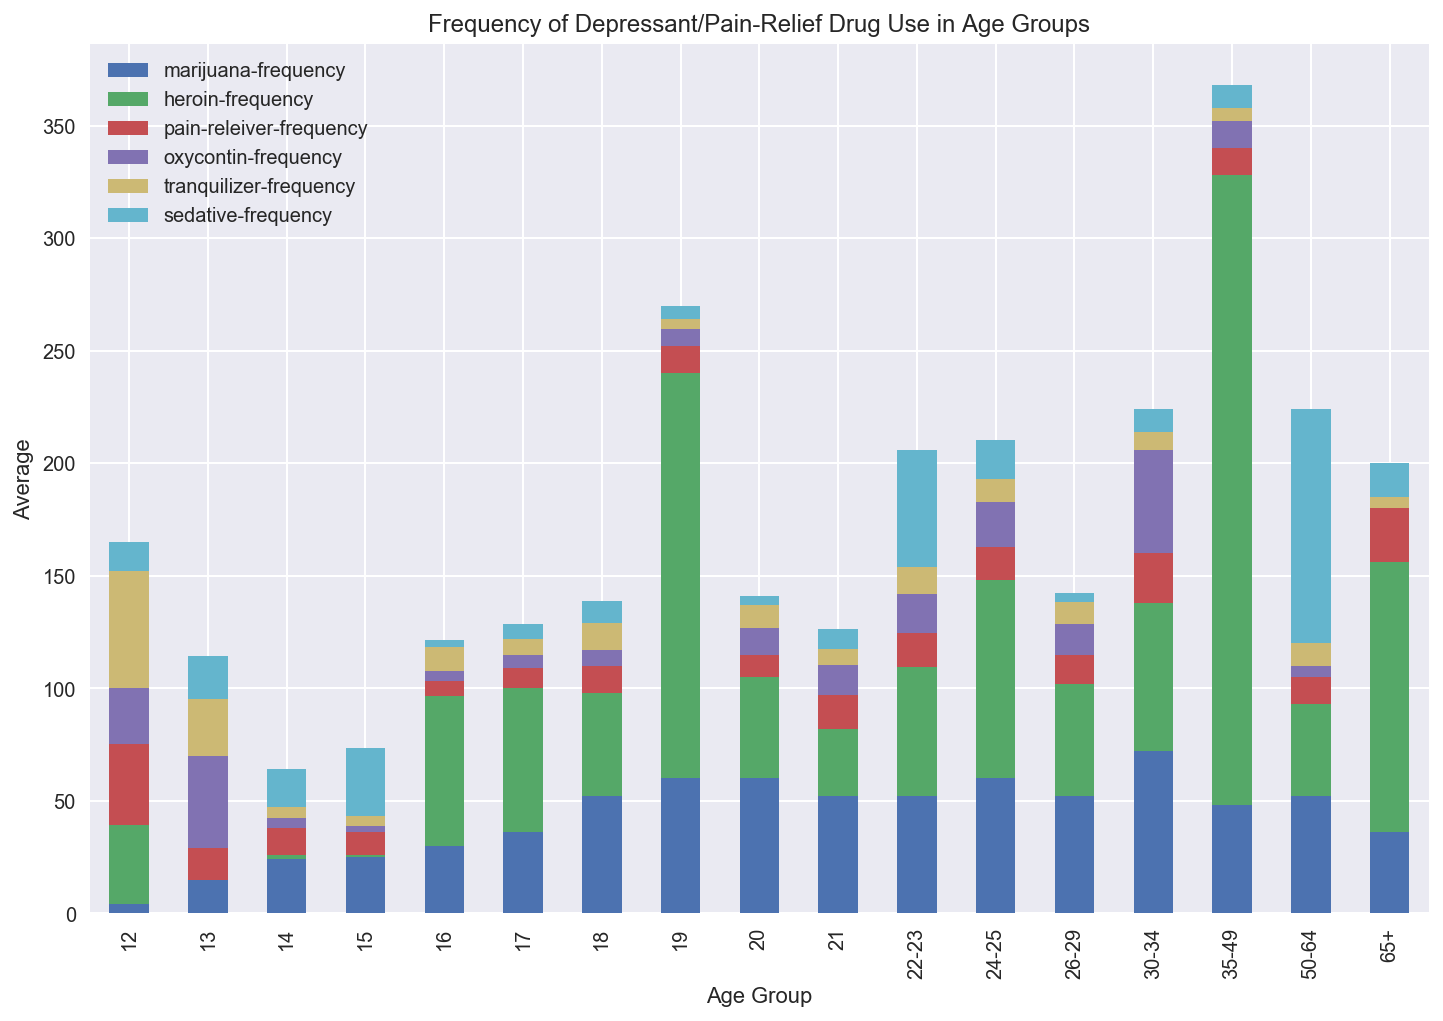

In [124]:
d_depress_freq_plot = d_depress_freq.set_index('age').plot(kind='bar', stacked=True, figsize=(12,8),
                                                           title='Frequency of Depressant/Pain-Relief Drug Use in Age Groups').set(
    ylabel='Average', xlabel='Age Group')

**QUESTION**

Although meth and heroin has smaller user percentage compared to other drugs, their frequency of use is high, which could signify addiction. What is the relationship between the frequency of heroin and meth? 

**HYPOTHESIS**

H0 - Heroin Frequency is greater than Meth Frequency

H1 - Meth Frequency is smaller than Heroin Frequency

In [141]:
meth_use = drug.loc[:,'meth-use']
meth_freq = drug.loc[:,'meth-frequency']
heroin_use = drug.loc[:,'heroin-use']
heroin_freq = drug.loc[:,'heroin-frequency']

In [170]:
#Plot empirical cumulative distribution function

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

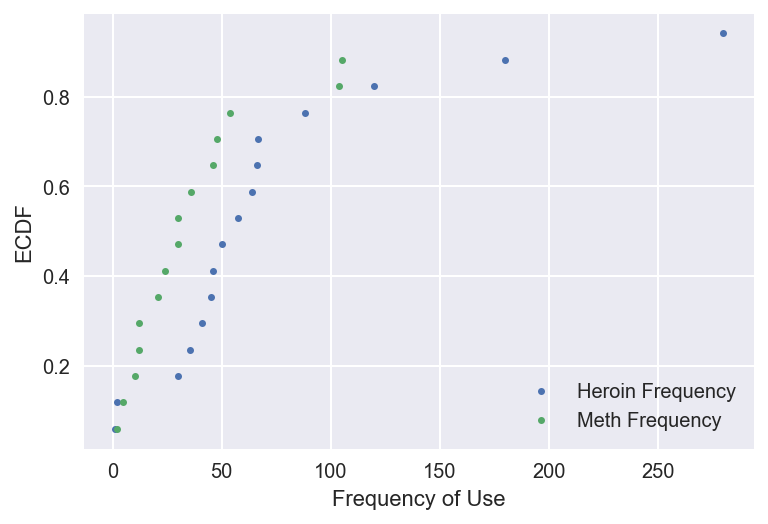

In [166]:
xheroinf, yheroinf = ecdf(heroin_freq)
xmethf, ymethf = ecdf(meth_freq)

_ = plt.plot(xheroinf, yheroinf, marker = '.', linestyle = 'none')
_ = plt.plot(xmethf, ymethf, marker = '.', linestyle = 'none')
plt.legend(('Heroin Frequency', 'Meth Frequency'), loc='lower right')
_ = plt.xlabel('Frequency of Use')
_ = plt.ylabel('ECDF')

Visually, it looks like our null hypothesis is correct. Let's test with T stat and P Value!

In [175]:
mean_diff = np.mean(heroin_freq)-np.mean(meth_freq)
mean_diff

37.31458333333333

In [180]:
heroin = np.array(heroin_freq)
meth = np.array(meth_freq)

In [183]:
#Remove Nan Value
heroin = heroin[~numpy.isnan(heroin)]
meth = meth[~numpy.isnan(meth)]

In [184]:
#Calculating with T Stat and P Value
t_stat, pvalue = stats.ttest_ind(heroin, meth)
print(t_stat, pvalue)

1.8847524965772195 0.06952103552404063


**Interpreting result with alpha = 0.05 or 95% confidence interval**

P Value 0.69 > 0.05, thus fail to reject null hypothesis that Heroin Frequency > Meth Frequency.

Reject Alternative Hypothesis. 

Thus - We are 95% confident that Heroin use Frequency is Higher than Meth use Frequency.

**REPORT**


**Drug use and frequency spread:** 

1. There are more drug users in age group 20 compared to other age groups. 
2. There are more depressant drug users compared to stimulant drug users. 
3. Older age groups (35 and above) uses stimulant drug more frequently. 
4. Age 35 - 49 uses depressant drug most frequently, then followed by age 19. 
5. Meth and Heroin both have low % of user per age group, but high frequency of usage which may signify addiction.
6. We are 95% confident that heroin usage frequency is higher than meth usage frequency.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [83]:
df_rate.head()

0    82
1    81
2    79
3    77
4    72
Name: Rate, dtype: int64

**Are there outliers in the dataset? Define, in words, how you numerically define outliers.**

One definition of outlier is any data point beyond 3 sigmas from the mean (which is 99.7% of the data). However this is tricky as it doesn't produce any result.

In [134]:
rate_outliers = [x for x in sat['Rate'] if (x < np.mean(sat['Rate']) - 3 * np.std(sat['Rate'])) 
                                   & (x > np.mean(sat['Rate']) + 3 * np.std(sat['Rate']))]
verbal_outliers = [x for x in sat['Verbal'] if (x < np.mean(sat['Verbal']) - 3 * np.std(sat['Verbal'])) 
                                   & (x > np.mean(sat['Verbal']) + 3 * np.std(sat['Verbal']))]
math_outliers = [x for x in sat['Math'] if (x < np.mean(sat['Math']) - 3 * np.std(sat['Math'])) 
                                   & (x > np.mean(sat['Math']) + 3 * np.std(sat['Math']))]

print(rate_outliers, verbal_outliers, math_outliers)

[] [] []


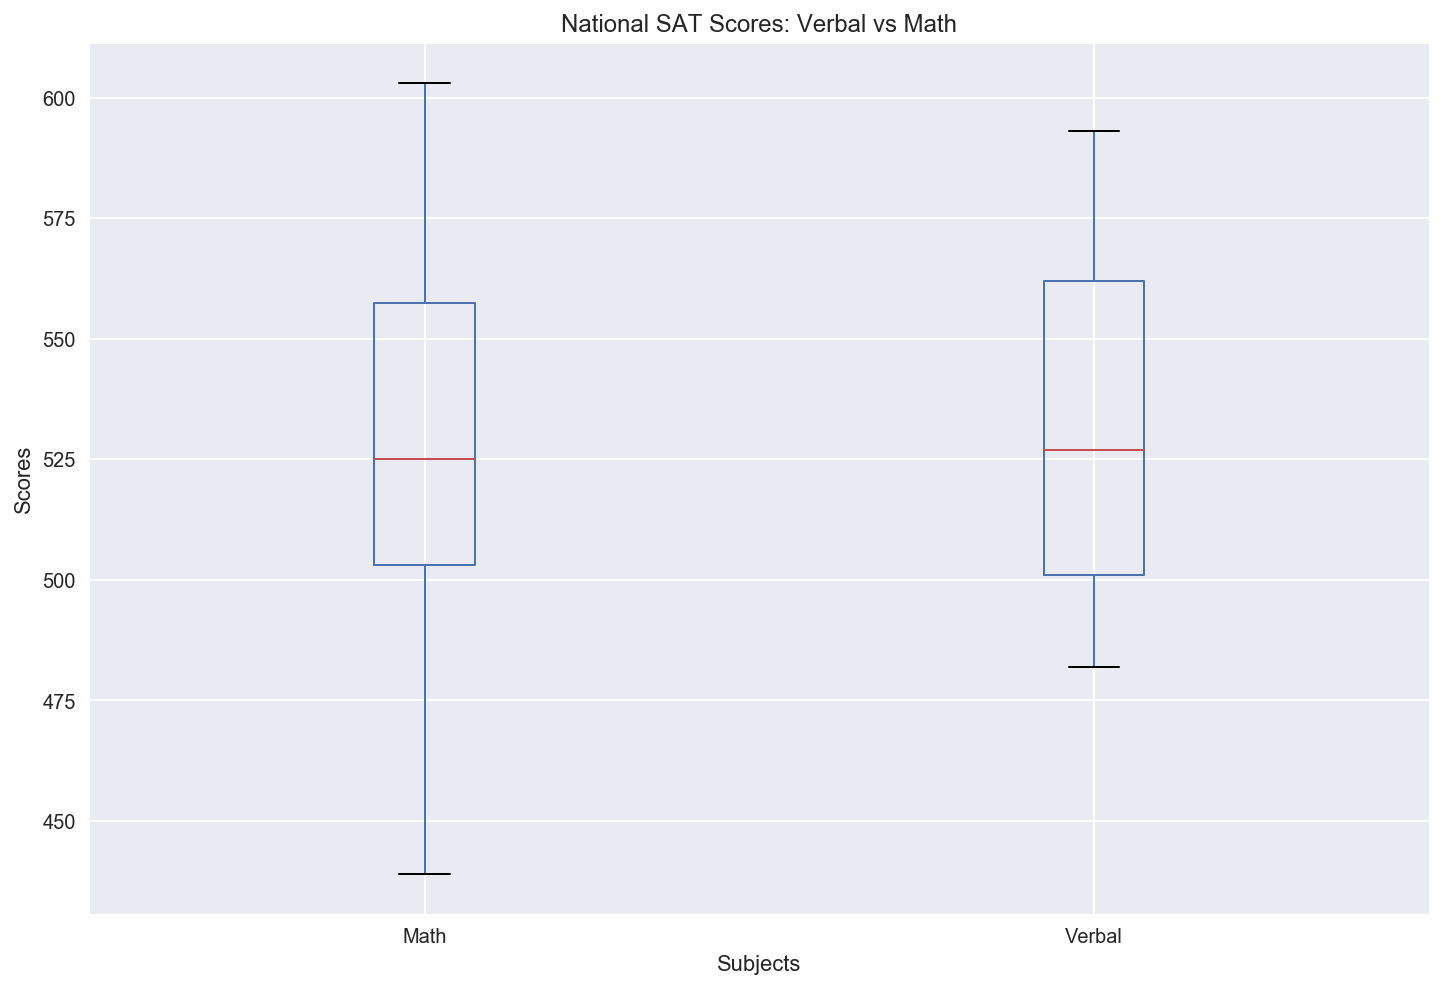

In [193]:
#Even from the boxplot you can't tell if there's an outlier.

plot = dfmv.plot.box(figsize=(12,8), grid=True, title = 'National SAT Scores: Verbal vs Math')\
.set(xlabel="Subjects", ylabel="Scores")

However... from the pairplot we can visually spot that there is an observation point that is distant from other observations. **So yes, there is an outlier**

From the plot, the outlier lies at approximately Rate 25 - 30, Verbal 520 - 540 and Math 400 - 450

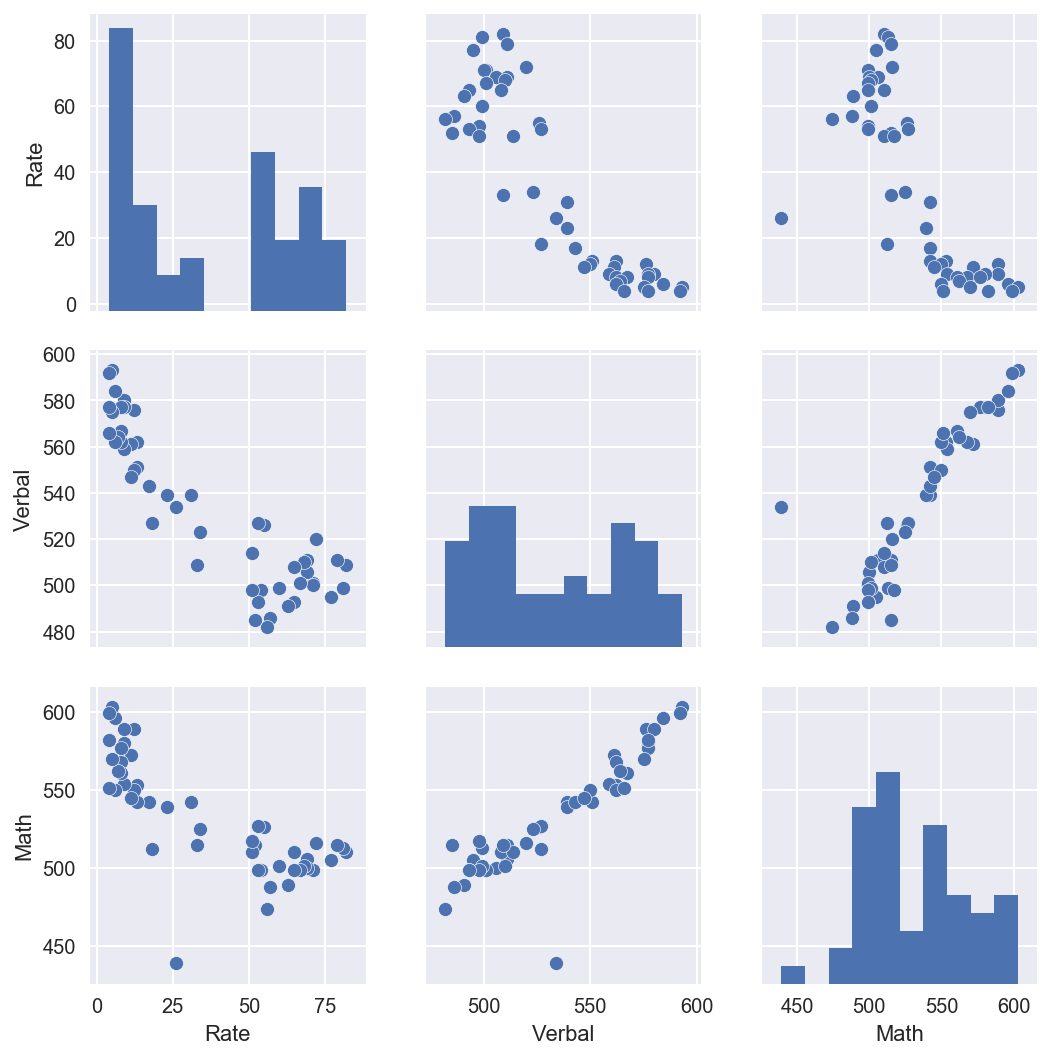

In [196]:
plot = sns.pairplot(sat)

In [156]:
#Let's print the outlier. '
outlier = sat.loc[(sat['Verbal'] <= 540) & (sat['Rate'] <= 30) & (sat['Math'] <= 450), :]
outlier

,State,Rate,Verbal,Math
27,OH,26,534,439


In [163]:
#Remove the outlier from dataset
sat_cleaner = sat.drop(27)

In [ ]:
np.median(sat), np.std(sat)

In [188]:
#Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. 
#What is different about them and why?

sat.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


In [167]:
sat_cleaner.describe()

,Rate,Verbal,Math
count,50.000000,50.000000,50.000000
mean,37.220000,532.500000,533.700000
std,27.785101,33.698695,34.120584
min,4.000000,482.000000,474.000000
25%,9.000000,501.000000,505.250000
50%,33.500000,526.500000,525.500000
75%,64.500000,562.000000,559.250000
max,82.000000,593.000000,603.000000


With the outlier removed, the standard deviation for math score is lower by 2 points, signifying that the distribution is slightly narrower. The lowest score for math is also adjusted to 474. Why? The outlier is a low math score that brought down the mean of the original dataset, with the outlier removed the mean of math score increase!

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

* How does the spearman correlation compare to the pearson correlation? 

**A:** The Pearson correlation evaluates the linear relationship between two continuous variables. ... The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data. 


* Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!

**A**: 
1. Order the scores from greatest to smallest; assign the rank 1 to the highest score, 2 to the next highest and so on. 
2. Add a third column, d, to your data. The d is the difference between ranks.
3. Add a fourth column, d-squared, which is the square of d.
3. Sum (add up) all of your d-squared values.
4. Formula = 1 - 6(sum* d-squared)/ n(n^2 - 1)

In [200]:
from scipy.stats import spearmanr
spearmanr(sat['Verbal'], sat['Math'])

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [207]:
sat['Percentile']= [stats.percentileofscore(sat['Rate'], i) for i in sat['Rate']]
sat.head()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1792: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pct = (np.mean(a_len[idx]) / n) * 100.0


,State,Rate,Verbal,Math,Percentile
0,CT,82,509,510,100.000000
1,NJ,81,499,513,98.039216
2,MA,79,511,515,96.078431
3,NY,77,495,505,94.117647
4,NH,72,520,516,92.156863


In [203]:
ca_sat = sat.loc[(sat['State'] == 'CA'), 'Percentile']
ca_sat

23    55.882353
Name: Percentile, dtype: float64

**How is percentile related to spearman rank correlation?**

A challenge in measuring correlation is that the variables we want to compare might not be expressed in the same units. For example, height might be in centimeters and weight in kilograms. And even if they are in the same units, they come from different distributions.

There are two common solutions to these problems:
1. Transform all values to standard scores. This leads to the Pearson coefficient of correlation.
2. Transform all values to their percentile ranks. This leads to the Spearman coefficient.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.